In [1]:
%matplotlib inline
import numpy as np
from matplotlib import pyplot as plt

import torch
from torch import nn, optim
from torch.autograd import Variable

Text(0, 0.5, 'y1')

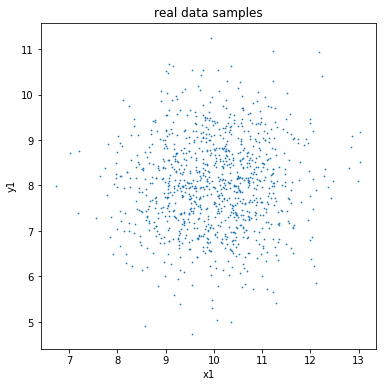

In [2]:
def sample_real(batch_size=100):
    x = torch.randn(batch_size, 2)   # x ~ N(mu=0,std=1)
    x[:,0] += 10
    x[:,1] += 8
    return x

plt.figure(figsize=[6,6])
x = sample_real(1000).numpy()
plt.scatter(x[:,0],x[:,1],0.5)
plt.title('real data samples')
plt.xlabel('x1')
plt.ylabel('y1')

In [3]:
# Discriminator
D = nn.Sequential(
    nn.Linear(2, 10),
    nn.LeakyReLU(0.2),
#     nn.Linear(50, 50),
#     nn.ReLU(),
    nn.Linear(10, 1),
    nn.Sigmoid())

# Generator
z_dim = 10
G = nn.Sequential(
    nn.Linear(z_dim, 20),
    nn.LeakyReLU(0.2),
#     nn.Linear(50, 50),
#     nn.ReLU(),
    nn.Linear(20, 2))

D.cuda()
G.cuda()

Sequential(
  (0): Linear(in_features=10, out_features=20, bias=True)
  (1): LeakyReLU(negative_slope=0.2)
  (2): Linear(in_features=20, out_features=2, bias=True)
)

In [4]:
batch_size = 300
def plot_decoder():
    plt.figure(figsize=[5,5])

    z = Variable(torch.randn(batch_size, z_dim)).cuda()
    x_gen = G(z).detach().cpu().numpy()
    
    plt.scatter(x_gen[:,0],x_gen[:,1],0.8)
    
    x_real = sample_real(batch_size).numpy()
    plt.scatter(x_real[:,0],x_real[:,1],0.8)
    plt.legend(['GAN','Real Data'])
    
    plt.xlim([-1,11])
    plt.ylim([-1,11])
    return x_gen.mean(0), x_gen.std(0)

In [5]:
max_epoch = 100000

criterion = nn.BCELoss()
d_optimizer = torch.optim.Adam(D.parameters(), lr=0.0001)
g_optimizer = torch.optim.Adam(G.parameters(), lr=0.0002)

Epoch [0/100000], d_loss: 1.2111, g_loss: 0.3826, D(x): 0.94, D(G(z)): 0.94


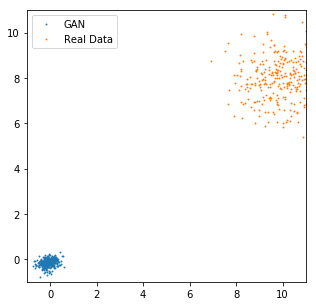

mean=[-0.08425295 -0.14934222], std=[ 0.2411485   0.17122826]
Epoch [500/100000], d_loss: 1.1963, g_loss: 0.3888, D(x): 0.94, D(G(z)): 0.94


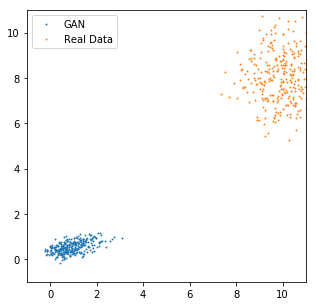

mean=[ 0.92049062  0.53116298], std=[ 0.60184121  0.2562252 ]
Epoch [1000/100000], d_loss: 1.2331, g_loss: 0.4169, D(x): 0.85, D(G(z)): 0.85


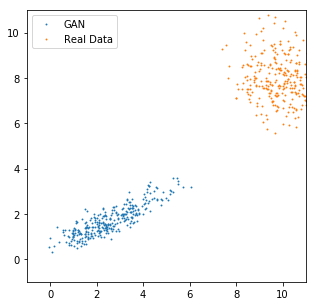

mean=[ 2.55258369  1.72052526], std=[ 1.21465492  0.66375118]
Epoch [1500/100000], d_loss: 1.2816, g_loss: 0.4765, D(x): 0.73, D(G(z)): 0.73


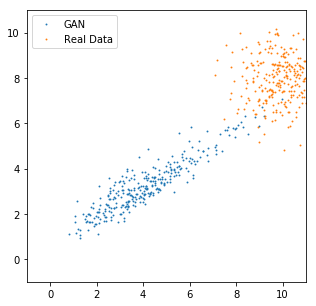

mean=[ 4.12526894  3.2704823 ], std=[ 1.76359093  1.15551329]
Epoch [2000/100000], d_loss: 1.3321, g_loss: 0.5545, D(x): 0.62, D(G(z)): 0.62


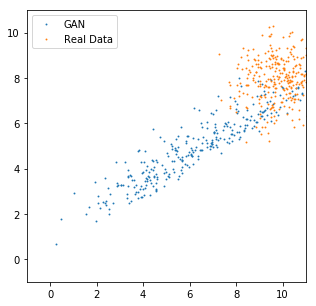

mean=[ 6.44131708  5.08203697], std=[ 2.64482307  1.67909431]
Epoch [2500/100000], d_loss: 1.3659, g_loss: 0.6455, D(x): 0.54, D(G(z)): 0.54


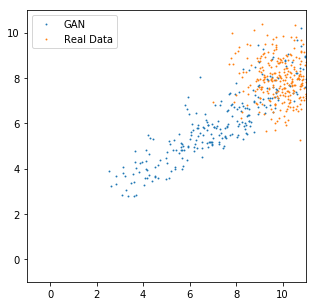

mean=[ 8.34109783  6.69192743], std=[ 3.20220041  2.20406628]
Epoch [3000/100000], d_loss: 1.3859, g_loss: 0.7146, D(x): 0.49, D(G(z)): 0.49


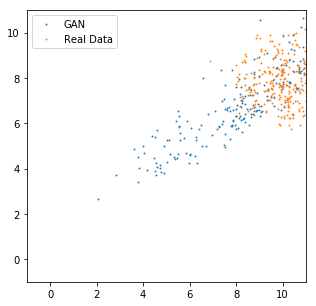

mean=[ 10.2443018    8.18494701], std=[ 3.83585739  2.66012669]
Epoch [3500/100000], d_loss: 1.3886, g_loss: 0.7468, D(x): 0.47, D(G(z)): 0.47


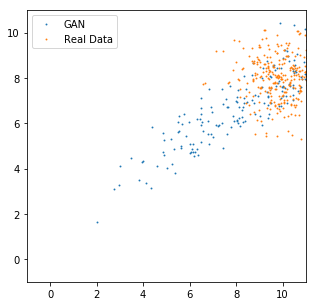

mean=[ 11.13067818   8.67782593], std=[ 4.39901638  2.95841265]
Epoch [4000/100000], d_loss: 1.3863, g_loss: 0.7370, D(x): 0.48, D(G(z)): 0.48


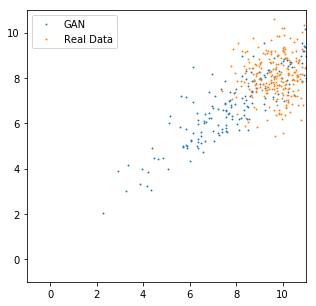

mean=[ 10.85233498   8.80776024], std=[ 4.14288044  2.92991185]
Epoch [4500/100000], d_loss: 1.3720, g_loss: 0.7174, D(x): 0.50, D(G(z)): 0.50


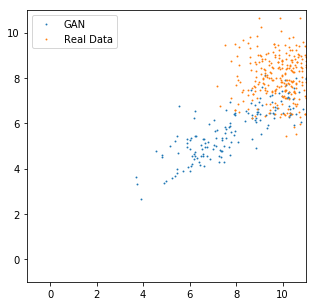

mean=[ 11.25640774   7.70444727], std=[ 4.39547873  2.6796267 ]
Epoch [5000/100000], d_loss: 1.3712, g_loss: 0.7032, D(x): 0.50, D(G(z)): 0.50


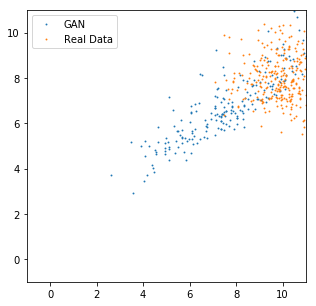

mean=[ 9.61602592  8.19097042], std=[ 3.60362887  2.64578462]
Epoch [5500/100000], d_loss: 1.3980, g_loss: 0.6904, D(x): 0.50, D(G(z)): 0.50


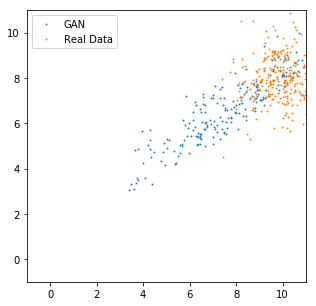

mean=[ 9.7064085   8.06925774], std=[ 3.77590728  2.67420411]
Epoch [6000/100000], d_loss: 1.4093, g_loss: 0.6729, D(x): 0.50, D(G(z)): 0.50


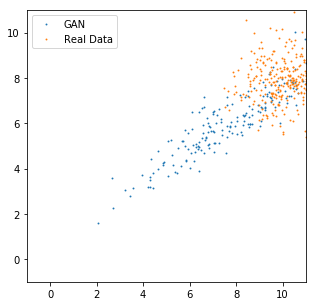

mean=[ 10.29490376   7.57377672], std=[ 4.00298214  2.51705074]
Epoch [6500/100000], d_loss: 1.4127, g_loss: 0.6923, D(x): 0.49, D(G(z)): 0.49


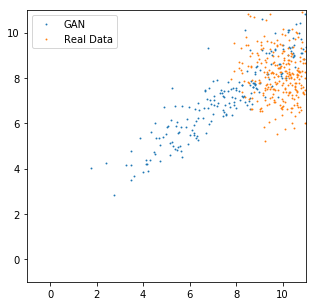

mean=[ 9.83348274  8.86677933], std=[ 3.89012384  3.02960372]
Epoch [7000/100000], d_loss: 1.4193, g_loss: 0.6693, D(x): 0.50, D(G(z)): 0.50


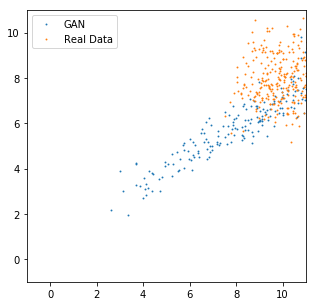

mean=[ 10.78592777   7.52836895], std=[ 4.34879541  2.71864057]
Epoch [7500/100000], d_loss: 1.4113, g_loss: 0.7015, D(x): 0.48, D(G(z)): 0.48


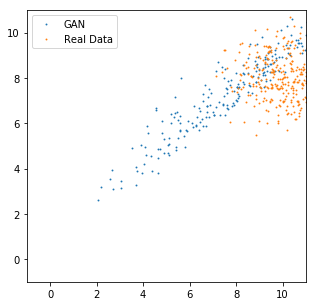

mean=[ 9.73836613  9.06115437], std=[ 3.94607067  3.22737956]
Epoch [8000/100000], d_loss: 1.4113, g_loss: 0.6703, D(x): 0.50, D(G(z)): 0.50


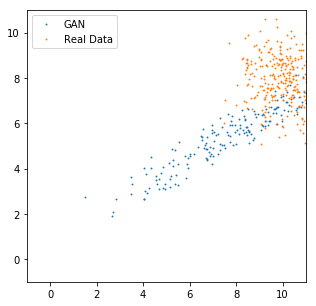

mean=[ 10.68589783   7.30634689], std=[ 4.54631329  2.84491205]
Epoch [8500/100000], d_loss: 1.4081, g_loss: 0.7078, D(x): 0.48, D(G(z)): 0.48


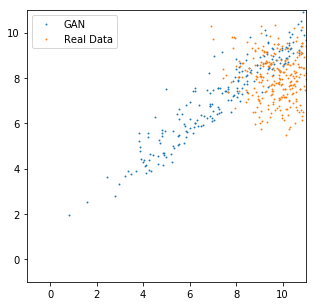

mean=[ 9.42571545  8.85106182], std=[ 3.94080496  3.26602912]
Epoch [9000/100000], d_loss: 1.4113, g_loss: 0.6668, D(x): 0.50, D(G(z)): 0.50


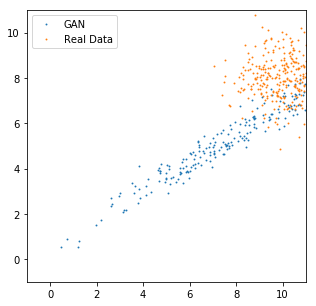

mean=[ 9.81996918  6.67580986], std=[ 4.6592288   2.96842718]
Epoch [9500/100000], d_loss: 1.4126, g_loss: 0.7020, D(x): 0.48, D(G(z)): 0.48


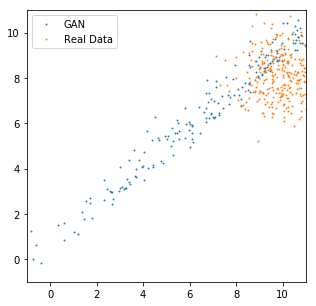

mean=[ 9.72480679  9.13803482], std=[ 5.76208639  4.96875715]
Epoch [10000/100000], d_loss: 1.4175, g_loss: 0.6639, D(x): 0.50, D(G(z)): 0.50


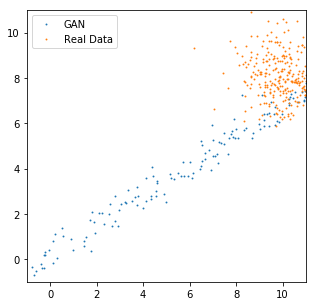

mean=[ 10.21390247   6.74763632], std=[ 9.21370316  5.93887281]
Epoch [10500/100000], d_loss: 1.4010, g_loss: 0.7064, D(x): 0.49, D(G(z)): 0.49


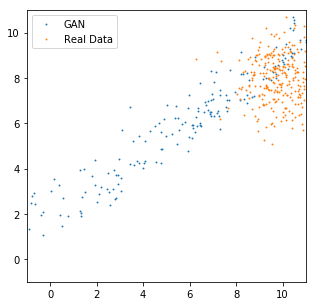

mean=[ 9.19377995  8.67973423], std=[ 7.14542627  5.334445  ]
Epoch [11000/100000], d_loss: 1.4082, g_loss: 0.6733, D(x): 0.50, D(G(z)): 0.50


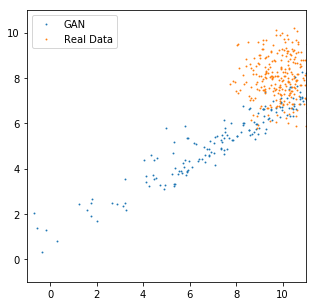

mean=[ 10.89701843   7.40502787], std=[ 5.31069756  3.2238028 ]
Epoch [11500/100000], d_loss: 1.4065, g_loss: 0.6949, D(x): 0.49, D(G(z)): 0.49


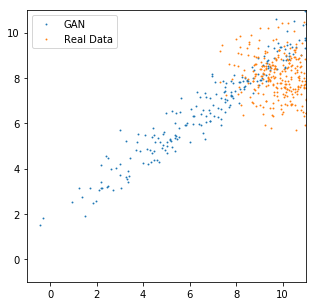

mean=[ 8.94559956  8.38560677], std=[ 4.52478123  3.53300428]
Epoch [12000/100000], d_loss: 1.4053, g_loss: 0.6707, D(x): 0.50, D(G(z)): 0.50


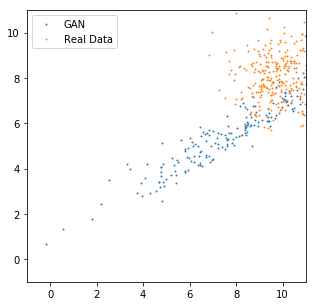

mean=[ 10.82813931   7.36720228], std=[ 4.85346222  2.9539001 ]
Epoch [12500/100000], d_loss: 1.3959, g_loss: 0.7080, D(x): 0.49, D(G(z)): 0.49


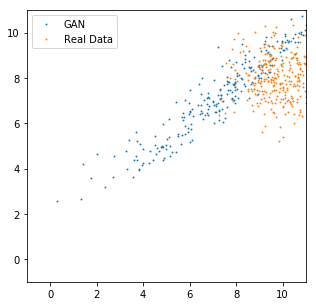

mean=[ 8.91400528  8.49845219], std=[ 3.89982963  3.12212372]
Epoch [13000/100000], d_loss: 1.3922, g_loss: 0.6732, D(x): 0.51, D(G(z)): 0.51


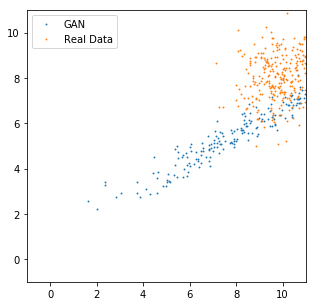

mean=[ 10.62264442   7.14707851], std=[ 4.38195372  2.66962767]
Epoch [13500/100000], d_loss: 1.3820, g_loss: 0.7208, D(x): 0.49, D(G(z)): 0.49


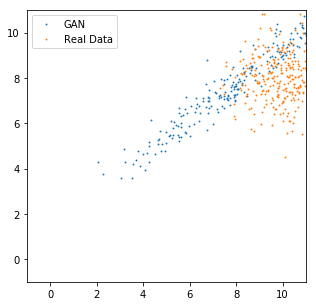

mean=[ 9.52544022  9.05398464], std=[ 3.60779095  2.98695803]
Epoch [14000/100000], d_loss: 1.3776, g_loss: 0.6822, D(x): 0.51, D(G(z)): 0.51


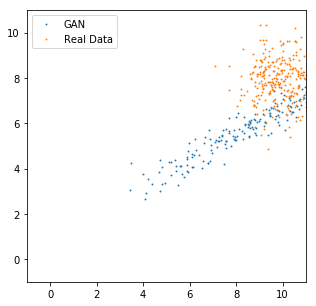

mean=[ 11.07550621   7.41131258], std=[ 4.07658911  2.52131748]
Epoch [14500/100000], d_loss: 1.3681, g_loss: 0.7231, D(x): 0.50, D(G(z)): 0.50


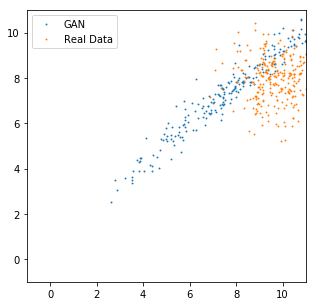

mean=[ 9.23384857  8.70161152], std=[ 3.39091325  2.86232829]
Epoch [15000/100000], d_loss: 1.3649, g_loss: 0.6935, D(x): 0.51, D(G(z)): 0.51


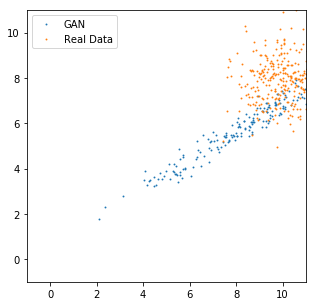

mean=[ 10.78763771   7.42429304], std=[ 4.07168102  2.65252995]
Epoch [15500/100000], d_loss: 1.3597, g_loss: 0.7109, D(x): 0.50, D(G(z)): 0.50


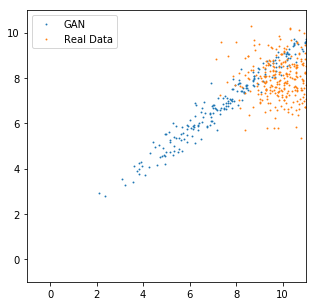

mean=[ 9.37349606  8.42949104], std=[ 3.56420779  2.91682577]
Epoch [16000/100000], d_loss: 1.3696, g_loss: 0.7010, D(x): 0.50, D(G(z)): 0.50


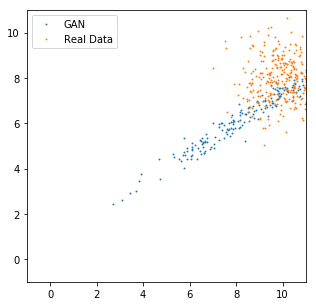

mean=[ 10.72068691   7.89537668], std=[ 3.60941148  2.48150134]
Epoch [16500/100000], d_loss: 1.3826, g_loss: 0.6808, D(x): 0.51, D(G(z)): 0.51


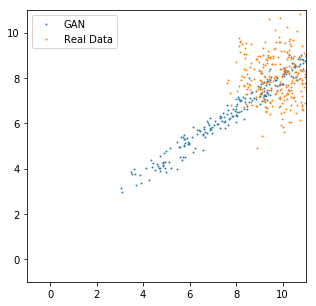

mean=[ 9.45974731  7.75257158], std=[ 3.4306376   2.63364196]
Epoch [17000/100000], d_loss: 1.3948, g_loss: 0.7102, D(x): 0.49, D(G(z)): 0.49


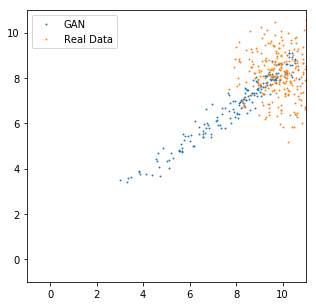

mean=[ 10.44884682   8.6967001 ], std=[ 3.60568571  2.83335042]
Epoch [17500/100000], d_loss: 1.4069, g_loss: 0.6542, D(x): 0.51, D(G(z)): 0.51


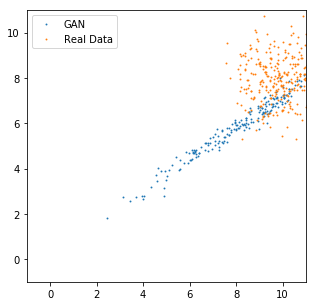

mean=[ 10.06469536   7.25336599], std=[ 3.3860755   2.38366747]
Epoch [18000/100000], d_loss: 1.3891, g_loss: 0.7288, D(x): 0.48, D(G(z)): 0.48


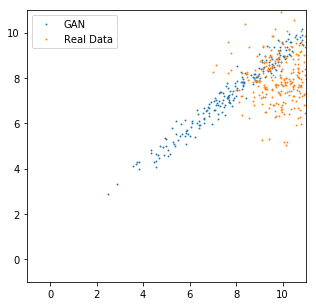

mean=[ 9.60490036  8.86548328], std=[ 3.39411306  2.91906166]
Epoch [18500/100000], d_loss: 1.3726, g_loss: 0.6792, D(x): 0.51, D(G(z)): 0.51


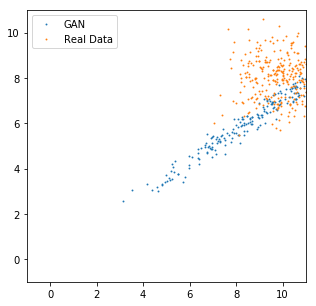

mean=[ 10.698699     7.59150076], std=[ 3.76966333  2.67006373]
Epoch [19000/100000], d_loss: 1.3815, g_loss: 0.6863, D(x): 0.51, D(G(z)): 0.51


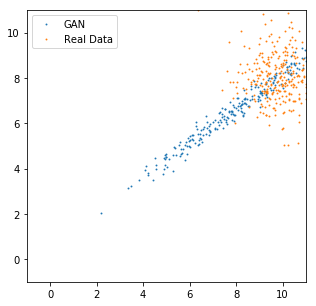

mean=[ 9.36761856  7.71923733], std=[ 3.39555788  2.66527915]
Epoch [19500/100000], d_loss: 1.4016, g_loss: 0.7203, D(x): 0.48, D(G(z)): 0.48


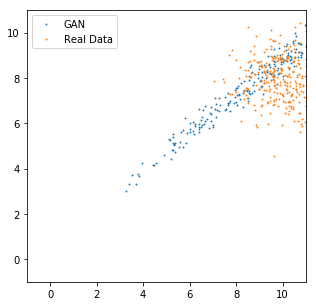

mean=[ 10.293787   9.053298], std=[ 3.69125485  3.04683971]
Epoch [20000/100000], d_loss: 1.3796, g_loss: 0.6705, D(x): 0.51, D(G(z)): 0.51


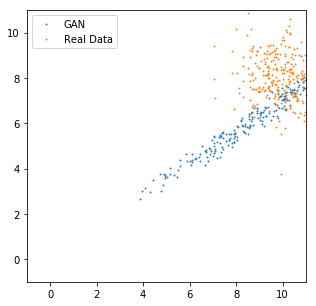

mean=[ 10.41126347   7.30213451], std=[ 3.59088588  2.50809216]
Epoch [20500/100000], d_loss: 1.3816, g_loss: 0.6860, D(x): 0.51, D(G(z)): 0.51


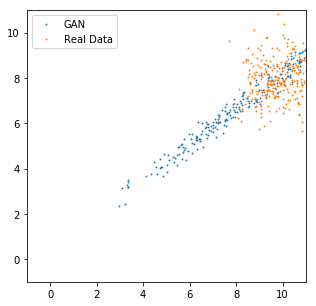

mean=[ 9.48758507  7.82834053], std=[ 3.41827035  2.73103976]
Epoch [21000/100000], d_loss: 1.3988, g_loss: 0.7223, D(x): 0.48, D(G(z)): 0.48


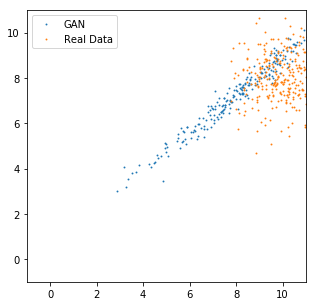

mean=[ 9.64395809  8.64066887], std=[ 3.43203783  2.89185095]
Epoch [21500/100000], d_loss: 1.3705, g_loss: 0.6805, D(x): 0.51, D(G(z)): 0.51


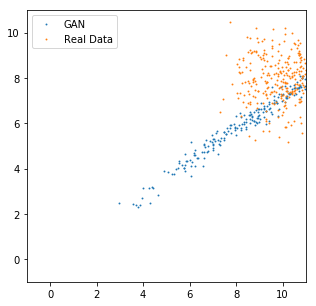

mean=[ 10.25813961   7.38492203], std=[ 3.72305822  2.70681715]
Epoch [22000/100000], d_loss: 1.3976, g_loss: 0.6640, D(x): 0.51, D(G(z)): 0.51


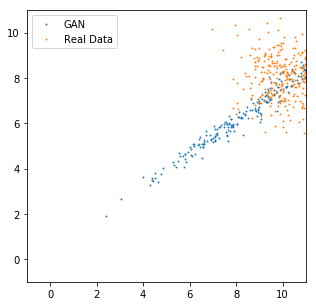

mean=[ 10.03719139   7.65256119], std=[ 3.30174041  2.46798229]
Epoch [22500/100000], d_loss: 1.3801, g_loss: 0.7238, D(x): 0.49, D(G(z)): 0.49


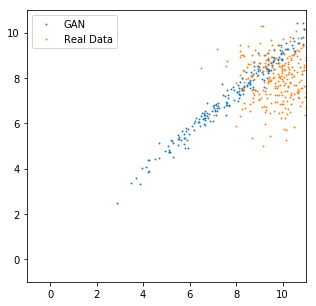

mean=[ 9.5486269   8.70710659], std=[ 3.31029201  2.86113405]
Epoch [23000/100000], d_loss: 1.3860, g_loss: 0.7001, D(x): 0.50, D(G(z)): 0.50


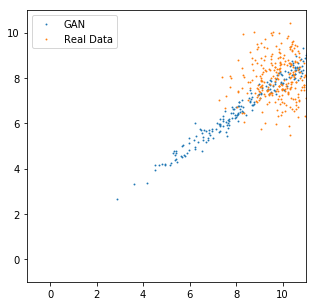

mean=[ 10.31969452   8.27432823], std=[ 3.45583463  2.71965265]
Epoch [23500/100000], d_loss: 1.3920, g_loss: 0.6603, D(x): 0.51, D(G(z)): 0.51


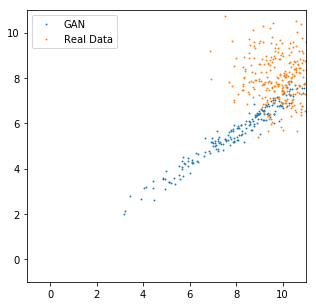

mean=[ 10.11914349   7.10586834], std=[ 3.47637129  2.45862246]
Epoch [24000/100000], d_loss: 1.3805, g_loss: 0.6910, D(x): 0.50, D(G(z)): 0.50


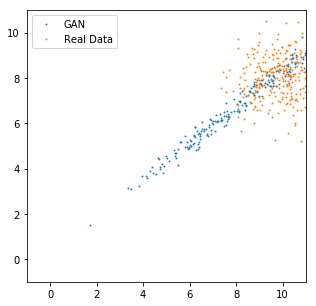

mean=[ 9.61654568  8.01967239], std=[ 3.37975788  2.73613977]
Epoch [24500/100000], d_loss: 1.3954, g_loss: 0.7268, D(x): 0.48, D(G(z)): 0.48


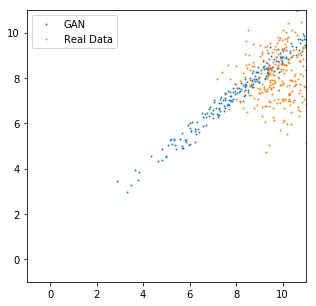

mean=[ 9.71740341  8.73622513], std=[ 3.15875936  2.69560242]
Epoch [25000/100000], d_loss: 1.3721, g_loss: 0.6880, D(x): 0.51, D(G(z)): 0.51


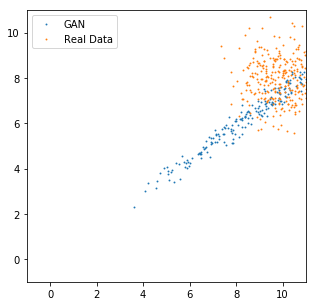

mean=[ 10.478158     7.69277525], std=[ 3.42151666  2.50485325]
Epoch [25500/100000], d_loss: 1.4045, g_loss: 0.6596, D(x): 0.51, D(G(z)): 0.51


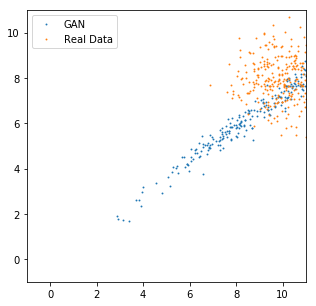

mean=[ 9.98033047  7.27098083], std=[ 3.33851171  2.48383069]
Epoch [26000/100000], d_loss: 1.3706, g_loss: 0.7275, D(x): 0.49, D(G(z)): 0.49


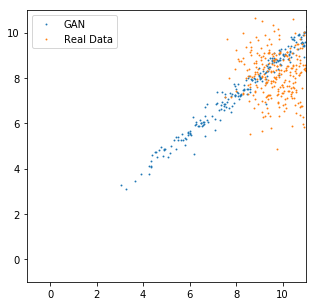

mean=[ 9.70396519  8.7656498 ], std=[ 3.21547365  2.8124671 ]
Epoch [26500/100000], d_loss: 1.3949, g_loss: 0.7045, D(x): 0.49, D(G(z)): 0.49


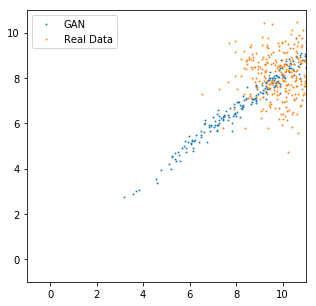

mean=[ 10.22226429   8.40774536], std=[ 3.30989456  2.71065331]
Epoch [27000/100000], d_loss: 1.3938, g_loss: 0.6587, D(x): 0.51, D(G(z)): 0.51


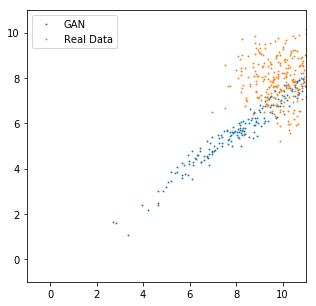

mean=[ 10.46347141   7.33157206], std=[ 3.59017205  2.62445688]
Epoch [27500/100000], d_loss: 1.3681, g_loss: 0.7130, D(x): 0.50, D(G(z)): 0.50


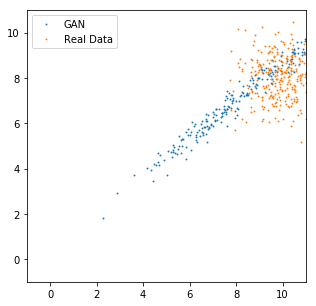

mean=[ 9.62546825  8.39965248], std=[ 3.30083942  2.81302977]
Epoch [28000/100000], d_loss: 1.3994, g_loss: 0.7061, D(x): 0.49, D(G(z)): 0.49


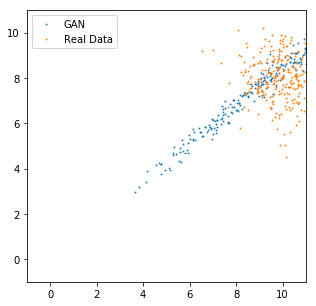

mean=[ 10.14424515   8.58808231], std=[ 3.20092821  2.71593761]
Epoch [28500/100000], d_loss: 1.3954, g_loss: 0.6574, D(x): 0.51, D(G(z)): 0.51


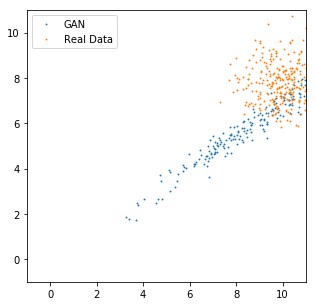

mean=[ 10.48881912   7.2263031 ], std=[ 3.33488727  2.420223  ]
Epoch [29000/100000], d_loss: 1.3668, g_loss: 0.7252, D(x): 0.49, D(G(z)): 0.49


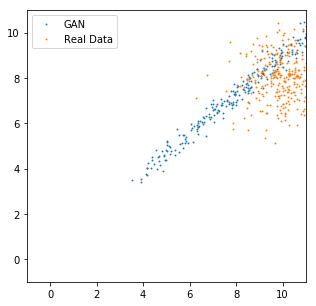

mean=[ 9.25849819  8.39501476], std=[ 3.25776839  2.87676501]
Epoch [29500/100000], d_loss: 1.3848, g_loss: 0.6955, D(x): 0.50, D(G(z)): 0.50


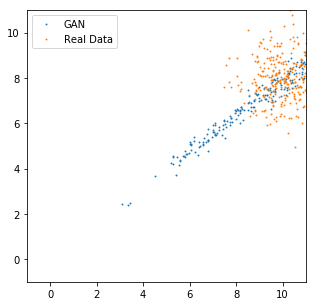

mean=[ 10.5483408    8.33298588], std=[ 3.47821879  2.8089838 ]
Epoch [30000/100000], d_loss: 1.4080, g_loss: 0.6599, D(x): 0.51, D(G(z)): 0.51


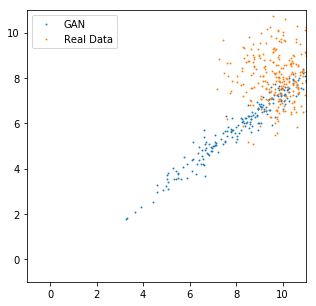

mean=[ 10.20187092   7.38943911], std=[ 3.45657754  2.63895464]
Epoch [30500/100000], d_loss: 1.3952, g_loss: 0.7202, D(x): 0.48, D(G(z)): 0.48


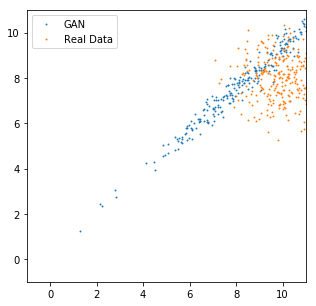

mean=[ 9.50241375  8.93389416], std=[ 3.27246904  3.07944012]
Epoch [31000/100000], d_loss: 1.3707, g_loss: 0.6832, D(x): 0.51, D(G(z)): 0.51


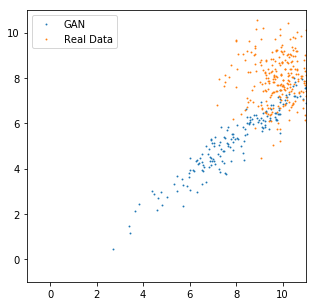

mean=[ 10.66982079   7.26276541], std=[ 3.81348181  2.86717725]
Epoch [31500/100000], d_loss: 1.3620, g_loss: 0.7147, D(x): 0.50, D(G(z)): 0.50


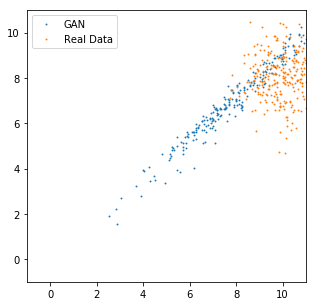

mean=[ 9.33867645  8.32503796], std=[ 3.21948743  2.94531918]
Epoch [32000/100000], d_loss: 1.3727, g_loss: 0.6954, D(x): 0.51, D(G(z)): 0.51


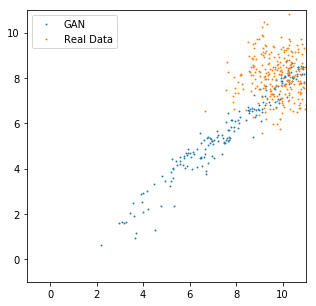

mean=[ 10.20311642   7.77746439], std=[ 3.91790104  3.28932166]
Epoch [32500/100000], d_loss: 1.3948, g_loss: 0.6722, D(x): 0.51, D(G(z)): 0.51


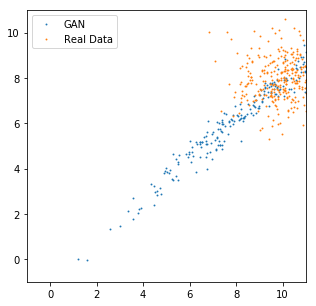

mean=[ 10.05214882   7.8655715 ], std=[ 3.84617615  3.28718805]
Epoch [33000/100000], d_loss: 1.4103, g_loss: 0.6938, D(x): 0.49, D(G(z)): 0.49


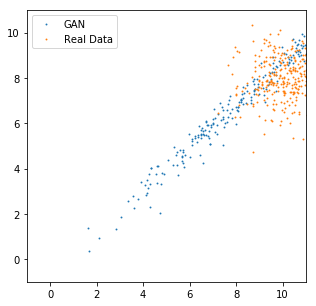

mean=[ 9.75693893  8.36324787], std=[ 3.75170255  3.46427417]
Epoch [33500/100000], d_loss: 1.4197, g_loss: 0.6600, D(x): 0.50, D(G(z)): 0.50


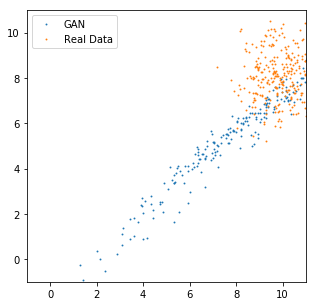

mean=[ 9.79141235  6.92467546], std=[ 4.02830219  3.28732562]
Epoch [34000/100000], d_loss: 1.4137, g_loss: 0.6957, D(x): 0.49, D(G(z)): 0.49


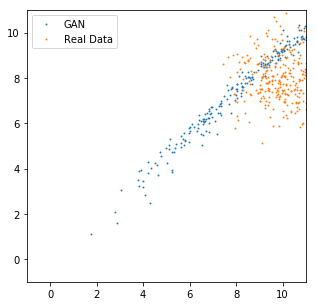

mean=[ 10.02280998   9.28726292], std=[ 3.90598965  3.73357582]
Epoch [34500/100000], d_loss: 1.4088, g_loss: 0.6693, D(x): 0.50, D(G(z)): 0.50


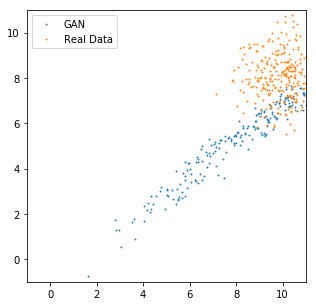

mean=[ 10.13108444   6.81996489], std=[ 4.00042915  3.07248354]
Epoch [35000/100000], d_loss: 1.3984, g_loss: 0.7033, D(x): 0.49, D(G(z)): 0.49


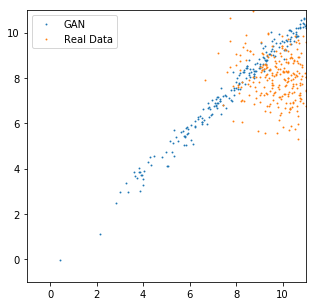

mean=[ 9.80713749  9.37007713], std=[ 3.82513189  3.71350288]
Epoch [35500/100000], d_loss: 1.3923, g_loss: 0.6828, D(x): 0.50, D(G(z)): 0.50


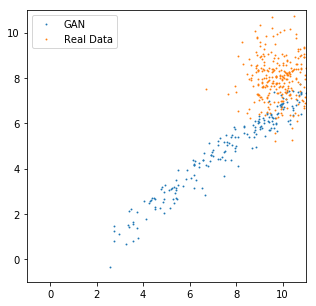

mean=[ 10.16524124   6.70463705], std=[ 4.36199331  3.24963284]
Epoch [36000/100000], d_loss: 1.3829, g_loss: 0.7110, D(x): 0.49, D(G(z)): 0.49


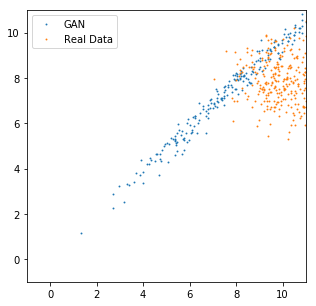

mean=[ 9.36227131  9.02587414], std=[ 3.58610964  3.4345541 ]
Epoch [36500/100000], d_loss: 1.3774, g_loss: 0.6976, D(x): 0.50, D(G(z)): 0.50


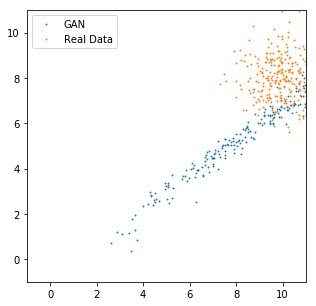

mean=[ 10.26123238   6.74064112], std=[ 3.99023128  2.87009382]
Epoch [37000/100000], d_loss: 1.3698, g_loss: 0.7123, D(x): 0.50, D(G(z)): 0.50


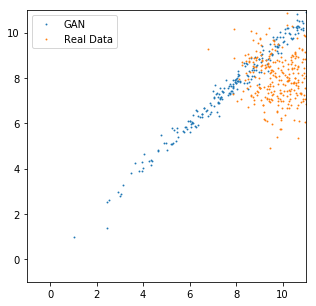

mean=[ 9.33278847  9.07042694], std=[ 3.32930756  3.18007898]
Epoch [37500/100000], d_loss: 1.3705, g_loss: 0.7029, D(x): 0.50, D(G(z)): 0.50


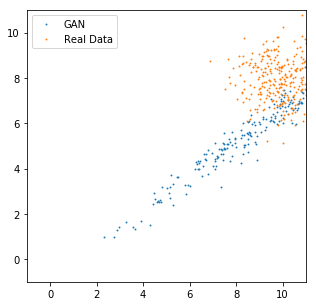

mean=[ 10.48365498   6.89415455], std=[ 3.71904922  2.70325184]
Epoch [38000/100000], d_loss: 1.3670, g_loss: 0.7135, D(x): 0.50, D(G(z)): 0.50


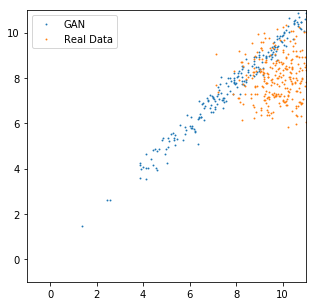

mean=[ 9.66995049  9.37050152], std=[ 3.60510993  3.41573429]
Epoch [38500/100000], d_loss: 1.3720, g_loss: 0.7020, D(x): 0.50, D(G(z)): 0.50


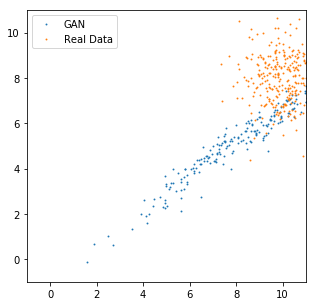

mean=[ 10.0856266    6.58410168], std=[ 3.77065587  2.67579436]
Epoch [39000/100000], d_loss: 1.3708, g_loss: 0.7098, D(x): 0.50, D(G(z)): 0.50


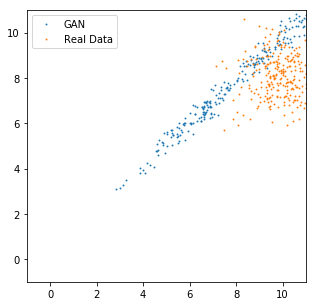

mean=[ 9.0209322   8.83362293], std=[ 3.24844885  3.05254054]
Epoch [39500/100000], d_loss: 1.3776, g_loss: 0.7022, D(x): 0.50, D(G(z)): 0.50


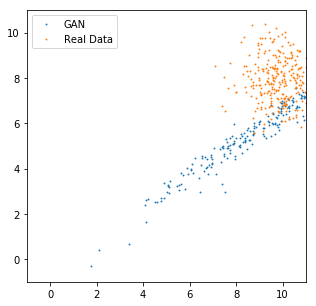

mean=[ 10.54935932   6.8524766 ], std=[ 3.79688621  2.72092509]
Epoch [40000/100000], d_loss: 1.3837, g_loss: 0.7031, D(x): 0.50, D(G(z)): 0.50


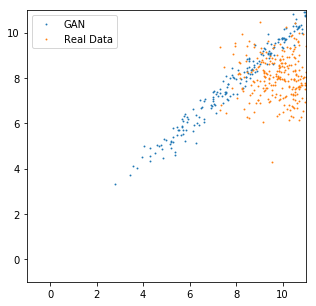

mean=[ 9.89880753  9.64425278], std=[ 3.33810163  3.10918403]
Epoch [40500/100000], d_loss: 1.3900, g_loss: 0.6945, D(x): 0.50, D(G(z)): 0.50


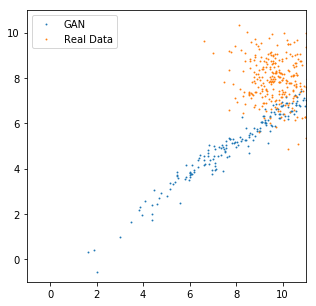

mean=[ 10.59787369   6.94870996], std=[ 3.89924693  2.77055383]
Epoch [41000/100000], d_loss: 1.4013, g_loss: 0.6933, D(x): 0.49, D(G(z)): 0.49


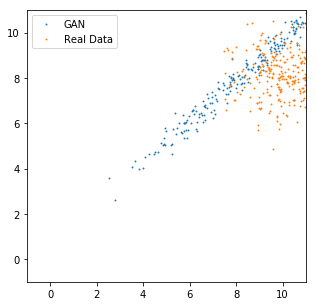

mean=[ 9.62038517  9.34728718], std=[ 3.18667865  2.89763379]
Epoch [41500/100000], d_loss: 1.4046, g_loss: 0.6951, D(x): 0.49, D(G(z)): 0.49


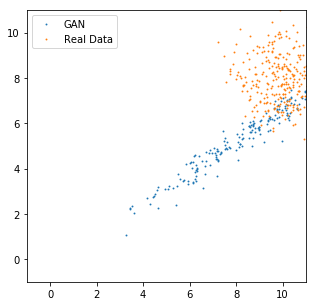

mean=[ 10.59147644   6.97153568], std=[ 3.89194942  2.72715139]
Epoch [42000/100000], d_loss: 1.4153, g_loss: 0.6720, D(x): 0.50, D(G(z)): 0.50


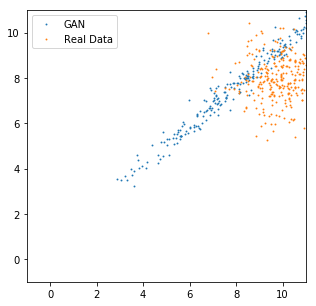

mean=[ 9.34788609  8.85642433], std=[ 3.26474428  2.88797379]
Epoch [42500/100000], d_loss: 1.4173, g_loss: 0.6947, D(x): 0.48, D(G(z)): 0.48


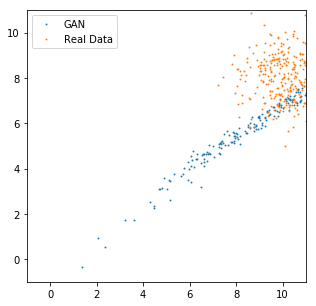

mean=[ 10.79986191   7.31955099], std=[ 3.62943745  2.56698632]
Epoch [43000/100000], d_loss: 1.4165, g_loss: 0.6685, D(x): 0.50, D(G(z)): 0.50


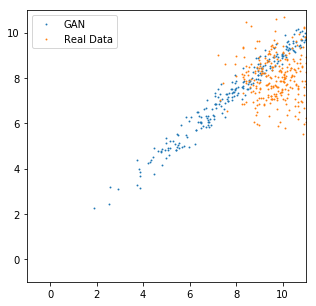

mean=[ 9.22454739  8.50365353], std=[ 3.24214673  2.86280298]
Epoch [43500/100000], d_loss: 1.4204, g_loss: 0.6805, D(x): 0.49, D(G(z)): 0.49


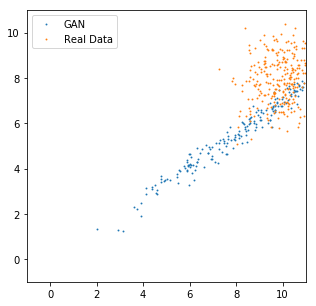

mean=[ 10.23168564   7.13103294], std=[ 3.75439405  2.73090935]
Epoch [44000/100000], d_loss: 1.4171, g_loss: 0.6754, D(x): 0.49, D(G(z)): 0.49


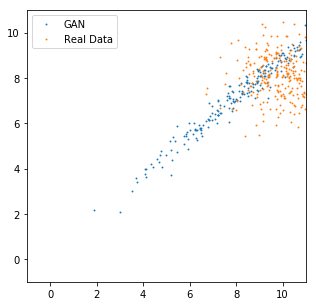

mean=[ 9.82563496  8.69262791], std=[ 3.28356552  2.80527306]
Epoch [44500/100000], d_loss: 1.4163, g_loss: 0.6784, D(x): 0.49, D(G(z)): 0.49


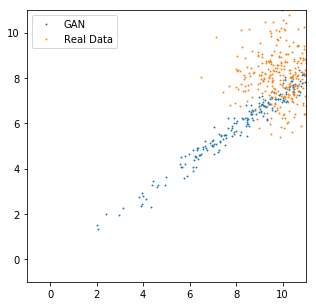

mean=[ 10.20366764   7.45569897], std=[ 3.56716657  2.67697883]
Epoch [45000/100000], d_loss: 1.4028, g_loss: 0.6751, D(x): 0.50, D(G(z)): 0.50


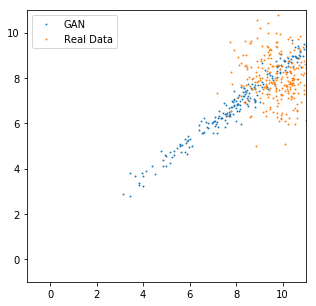

mean=[ 9.7517271   8.27828312], std=[ 3.26761293  2.69557858]
Epoch [45500/100000], d_loss: 1.4005, g_loss: 0.6865, D(x): 0.50, D(G(z)): 0.50


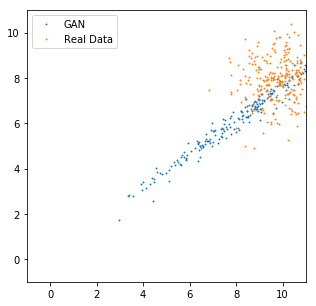

mean=[ 10.08826351   7.705235  ], std=[ 3.68959832  2.79315639]
Epoch [46000/100000], d_loss: 1.3913, g_loss: 0.6800, D(x): 0.51, D(G(z)): 0.51


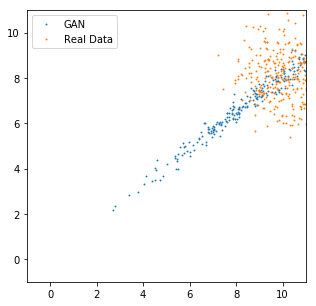

mean=[ 9.68725681  7.842906  ], std=[ 3.0342319   2.41480517]
Epoch [46500/100000], d_loss: 1.3818, g_loss: 0.6965, D(x): 0.50, D(G(z)): 0.50


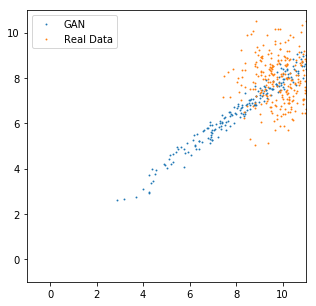

mean=[ 9.97074795  7.98667717], std=[ 3.13042903  2.47423697]
Epoch [47000/100000], d_loss: 1.3664, g_loss: 0.6858, D(x): 0.51, D(G(z)): 0.51


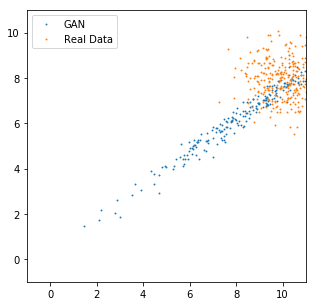

mean=[ 9.83890915  7.52275705], std=[ 3.35652637  2.51340175]
Epoch [47500/100000], d_loss: 1.3741, g_loss: 0.7085, D(x): 0.50, D(G(z)): 0.50


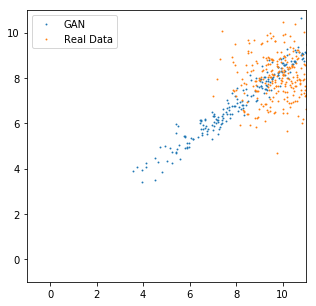

mean=[ 10.04483032   8.47663879], std=[ 3.4280746   2.73612928]
Epoch [48000/100000], d_loss: 1.3640, g_loss: 0.6943, D(x): 0.51, D(G(z)): 0.51


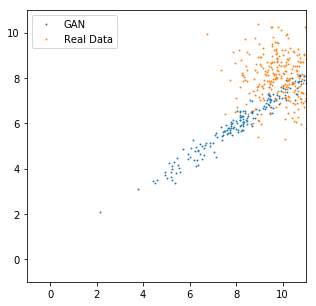

mean=[ 10.24520683   7.52603674], std=[ 3.30645442  2.39559722]
Epoch [48500/100000], d_loss: 1.3613, g_loss: 0.7092, D(x): 0.51, D(G(z)): 0.51


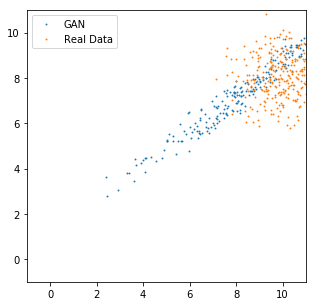

mean=[ 9.65074253  8.52548504], std=[ 3.18346596  2.6070292 ]
Epoch [49000/100000], d_loss: 1.3552, g_loss: 0.7112, D(x): 0.51, D(G(z)): 0.51


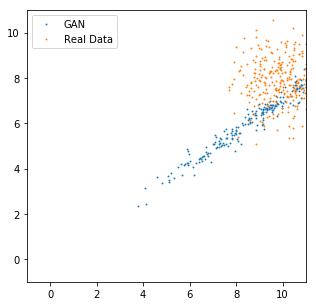

mean=[ 10.23327351   7.23258305], std=[ 3.19455385  2.32935882]
Epoch [49500/100000], d_loss: 1.3518, g_loss: 0.7067, D(x): 0.51, D(G(z)): 0.51


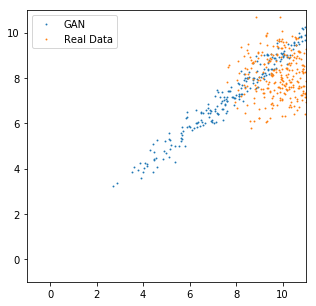

mean=[ 9.39113426  8.6021595 ], std=[ 3.37136245  2.90045333]
Epoch [50000/100000], d_loss: 1.3543, g_loss: 0.7137, D(x): 0.51, D(G(z)): 0.51


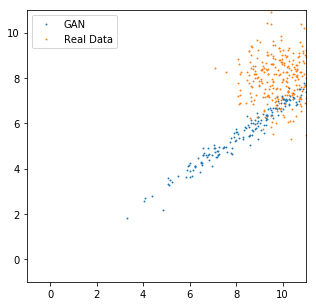

mean=[ 10.90217113   7.43331528], std=[ 3.55296469  2.55110621]
Epoch [50500/100000], d_loss: 1.3508, g_loss: 0.7138, D(x): 0.51, D(G(z)): 0.51


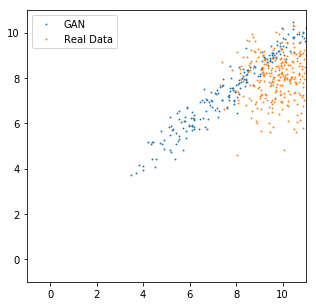

mean=[ 9.64525223  9.15451431], std=[ 3.45119476  3.05509591]
Epoch [51000/100000], d_loss: 1.3599, g_loss: 0.7074, D(x): 0.51, D(G(z)): 0.51


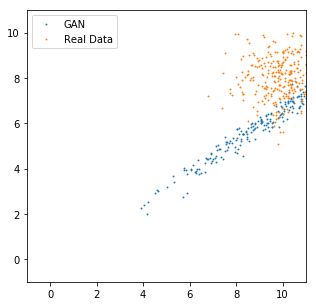

mean=[ 10.55310059   6.95952463], std=[ 3.21909904  2.24105382]
Epoch [51500/100000], d_loss: 1.3643, g_loss: 0.7155, D(x): 0.50, D(G(z)): 0.50


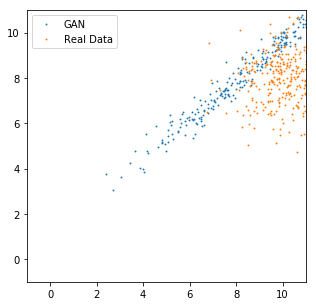

mean=[ 9.43365192  9.17940044], std=[ 3.24564314  2.92072058]
Epoch [52000/100000], d_loss: 1.3769, g_loss: 0.7029, D(x): 0.50, D(G(z)): 0.50


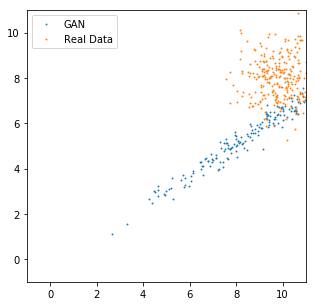

mean=[ 10.76126003   7.02310562], std=[ 3.45983315  2.4353056 ]
Epoch [52500/100000], d_loss: 1.3865, g_loss: 0.7004, D(x): 0.50, D(G(z)): 0.50


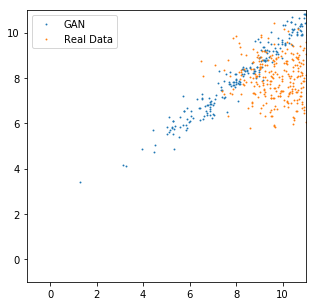

mean=[ 9.70155048  9.47844505], std=[ 3.07741427  2.76120138]
Epoch [53000/100000], d_loss: 1.3945, g_loss: 0.6936, D(x): 0.50, D(G(z)): 0.50


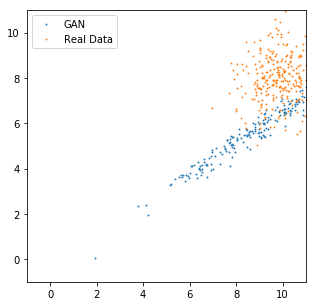

mean=[ 10.66578579   6.94714832], std=[ 3.25325227  2.25747442]
Epoch [53500/100000], d_loss: 1.4068, g_loss: 0.6875, D(x): 0.49, D(G(z)): 0.49


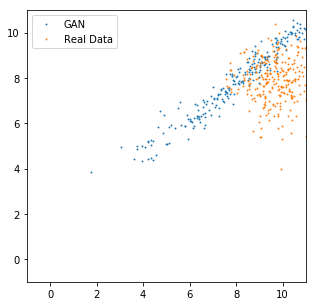

mean=[ 9.20708656  8.9309063 ], std=[ 2.90552497  2.52213693]
Epoch [54000/100000], d_loss: 1.4119, g_loss: 0.6887, D(x): 0.49, D(G(z)): 0.49


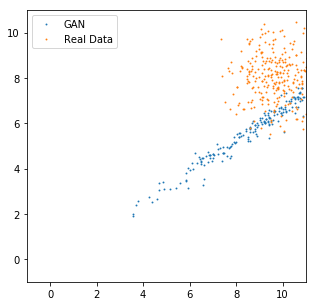

mean=[ 10.53601837   6.98083067], std=[ 3.23333144  2.26773763]
Epoch [54500/100000], d_loss: 1.4158, g_loss: 0.6759, D(x): 0.49, D(G(z)): 0.49


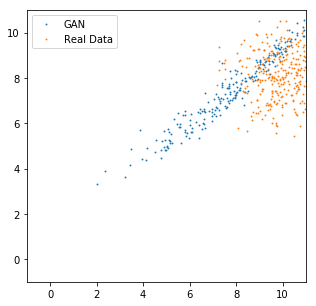

mean=[ 9.31113338  8.81974316], std=[ 3.12803268  2.74004292]
Epoch [55000/100000], d_loss: 1.4170, g_loss: 0.6822, D(x): 0.49, D(G(z)): 0.49


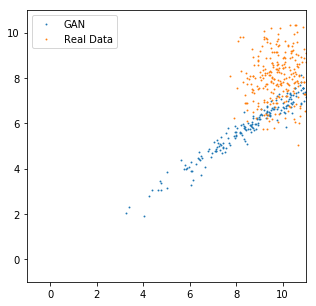

mean=[ 10.54861259   7.23627377], std=[ 3.28123569  2.31711817]
Epoch [55500/100000], d_loss: 1.4205, g_loss: 0.6729, D(x): 0.49, D(G(z)): 0.49


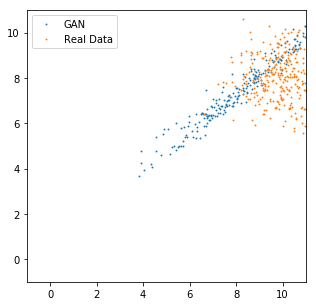

mean=[ 9.54456997  8.66156101], std=[ 2.96871901  2.53328323]
Epoch [56000/100000], d_loss: 1.4190, g_loss: 0.6741, D(x): 0.49, D(G(z)): 0.49


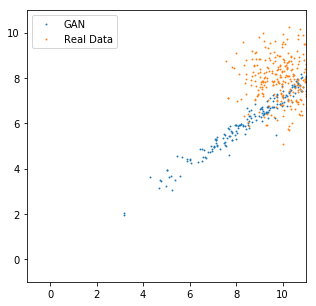

mean=[ 10.3505764    7.40291405], std=[ 2.97217345  2.18252659]
Epoch [56500/100000], d_loss: 1.4163, g_loss: 0.6800, D(x): 0.49, D(G(z)): 0.49


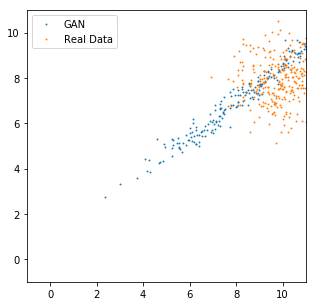

mean=[ 9.97350025  8.59979439], std=[ 3.32947779  2.74834943]
Epoch [57000/100000], d_loss: 1.4058, g_loss: 0.6741, D(x): 0.50, D(G(z)): 0.50


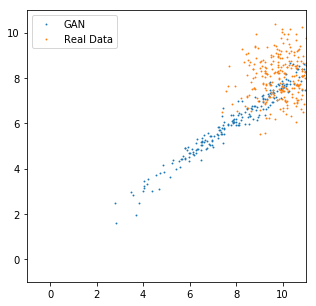

mean=[ 9.72080231  7.43513346], std=[ 3.36802864  2.58115315]
Epoch [57500/100000], d_loss: 1.3869, g_loss: 0.6913, D(x): 0.50, D(G(z)): 0.50


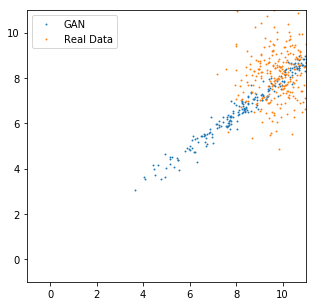

mean=[ 9.94344139  7.97620201], std=[ 3.08990788  2.47390771]
Epoch [58000/100000], d_loss: 1.3778, g_loss: 0.6883, D(x): 0.51, D(G(z)): 0.51


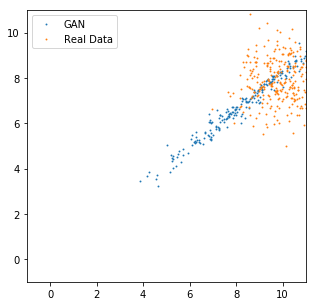

mean=[ 9.81491661  8.08053017], std=[ 2.96293998  2.4443543 ]
Epoch [58500/100000], d_loss: 1.3589, g_loss: 0.7042, D(x): 0.51, D(G(z)): 0.51


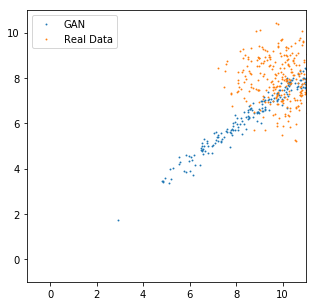

mean=[ 10.3944025    7.69597721], std=[ 3.00457048  2.2986362 ]
Epoch [59000/100000], d_loss: 1.3545, g_loss: 0.7053, D(x): 0.51, D(G(z)): 0.51


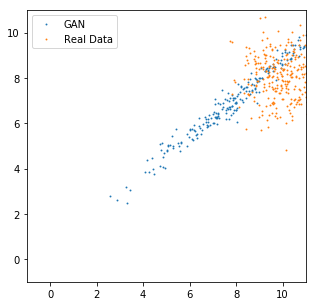

mean=[ 9.44653702  8.36331177], std=[ 3.13804245  2.71051812]
Epoch [59500/100000], d_loss: 1.3528, g_loss: 0.7118, D(x): 0.51, D(G(z)): 0.51


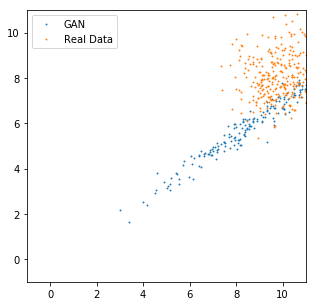

mean=[ 10.68374062   7.41262102], std=[ 3.46437049  2.52543545]
Epoch [60000/100000], d_loss: 1.3489, g_loss: 0.7153, D(x): 0.51, D(G(z)): 0.51


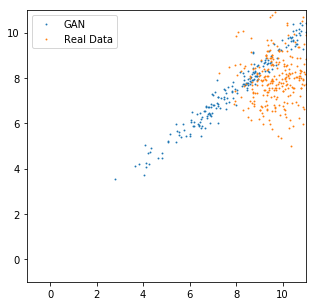

mean=[ 9.68861675  9.09527874], std=[ 3.05437398  2.75844598]
Epoch [60500/100000], d_loss: 1.3541, g_loss: 0.7080, D(x): 0.51, D(G(z)): 0.51


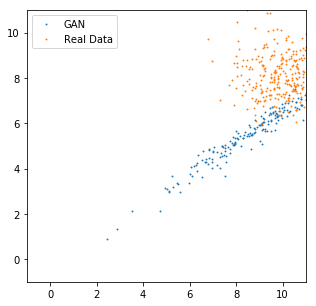

mean=[ 10.82865238   7.12438059], std=[ 3.45969439  2.43923974]
Epoch [61000/100000], d_loss: 1.3657, g_loss: 0.7115, D(x): 0.50, D(G(z)): 0.50


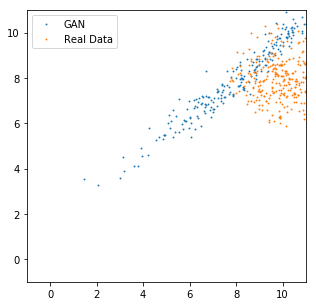

mean=[ 9.31591797  9.15848255], std=[ 2.89539838  2.58702493]
Epoch [61500/100000], d_loss: 1.3785, g_loss: 0.7014, D(x): 0.50, D(G(z)): 0.50


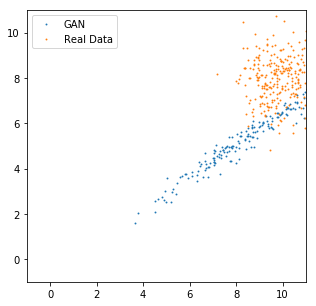

mean=[ 10.73598576   6.94794989], std=[ 3.52486587  2.48583555]
Epoch [62000/100000], d_loss: 1.3950, g_loss: 0.6928, D(x): 0.50, D(G(z)): 0.50


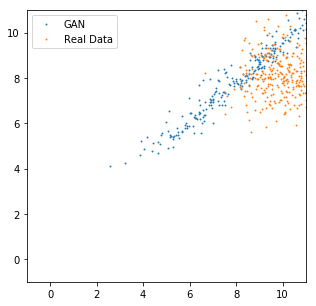

mean=[ 9.31078815  9.10077095], std=[ 3.08074737  2.79607415]
Epoch [62500/100000], d_loss: 1.4037, g_loss: 0.6956, D(x): 0.49, D(G(z)): 0.49


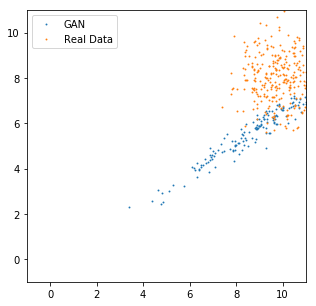

mean=[ 11.19644833   7.31734037], std=[ 3.25276613  2.24022055]
Epoch [63000/100000], d_loss: 1.4181, g_loss: 0.6823, D(x): 0.49, D(G(z)): 0.49


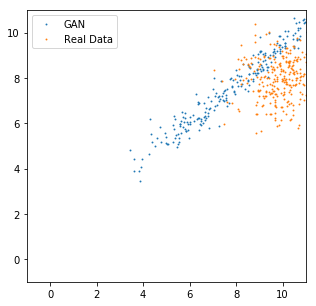

mean=[ 9.3126812   8.93857002], std=[ 3.24849057  2.8915782 ]
Epoch [63500/100000], d_loss: 1.4202, g_loss: 0.6808, D(x): 0.49, D(G(z)): 0.49


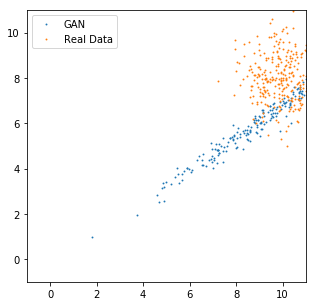

mean=[ 10.55739975   7.13684797], std=[ 3.25700164  2.32174325]
Epoch [64000/100000], d_loss: 1.4235, g_loss: 0.6795, D(x): 0.49, D(G(z)): 0.49


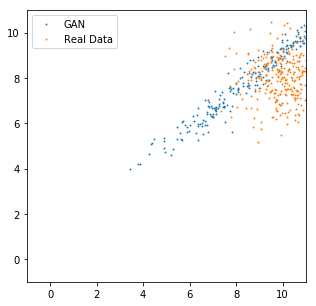

mean=[ 9.72703266  8.95535851], std=[ 2.89503694  2.53329825]
Epoch [64500/100000], d_loss: 1.4198, g_loss: 0.6708, D(x): 0.50, D(G(z)): 0.50


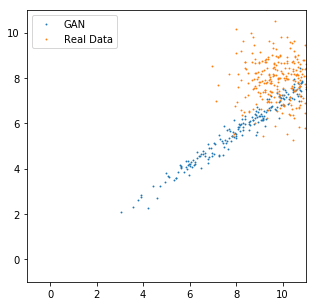

mean=[ 10.15594101   7.19933987], std=[ 3.32579637  2.46612072]
Epoch [65000/100000], d_loss: 1.4172, g_loss: 0.6844, D(x): 0.49, D(G(z)): 0.49


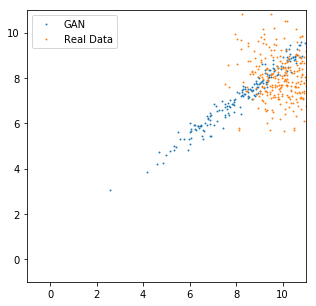

mean=[ 10.32480717   8.97001934], std=[ 3.21060753  2.75363398]
Epoch [65500/100000], d_loss: 1.4096, g_loss: 0.6714, D(x): 0.50, D(G(z)): 0.50


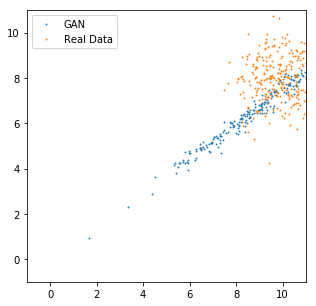

mean=[ 10.07101536   7.56245947], std=[ 2.92695856  2.29847765]
Epoch [66000/100000], d_loss: 1.3961, g_loss: 0.6880, D(x): 0.50, D(G(z)): 0.50


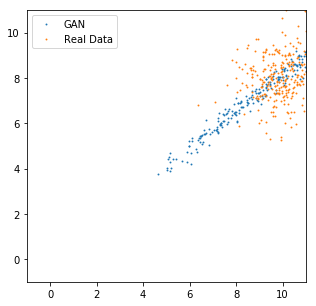

mean=[ 10.14494801   8.26982689], std=[ 2.90267944  2.37659359]
Epoch [66500/100000], d_loss: 1.3901, g_loss: 0.6888, D(x): 0.50, D(G(z)): 0.50


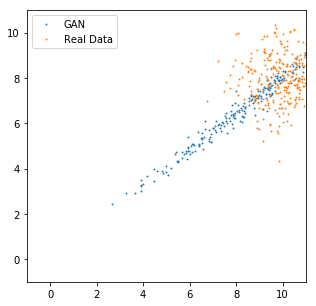

mean=[ 9.82061768  7.88509703], std=[ 3.41954136  2.75239015]
Epoch [67000/100000], d_loss: 1.3736, g_loss: 0.6900, D(x): 0.51, D(G(z)): 0.51


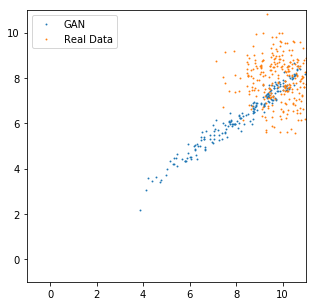

mean=[ 9.9723959   7.67864895], std=[ 2.96963     2.33156419]
Epoch [67500/100000], d_loss: 1.3659, g_loss: 0.7015, D(x): 0.51, D(G(z)): 0.51


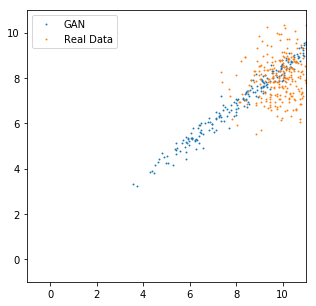

mean=[ 9.81671524  8.344491  ], std=[ 3.09358311  2.58470225]
Epoch [68000/100000], d_loss: 1.3602, g_loss: 0.7013, D(x): 0.51, D(G(z)): 0.51


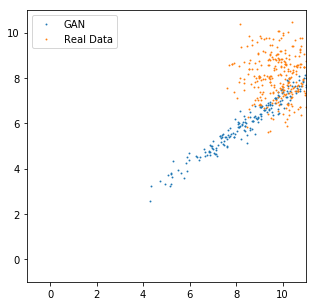

mean=[ 10.24455452   7.36091709], std=[ 2.92167592  2.2127943 ]
Epoch [68500/100000], d_loss: 1.3480, g_loss: 0.7152, D(x): 0.51, D(G(z)): 0.51


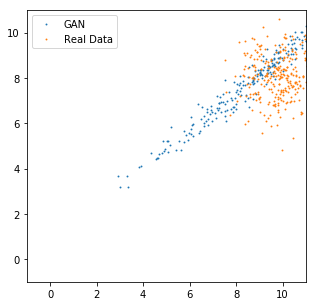

mean=[ 9.87472916  8.9277401 ], std=[ 3.16005254  2.71468401]
Epoch [69000/100000], d_loss: 1.3474, g_loss: 0.7101, D(x): 0.51, D(G(z)): 0.51


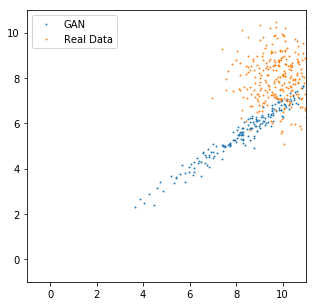

mean=[ 10.32176971   7.01496315], std=[ 3.13946295  2.2371974 ]
Epoch [69500/100000], d_loss: 1.3508, g_loss: 0.7152, D(x): 0.51, D(G(z)): 0.51


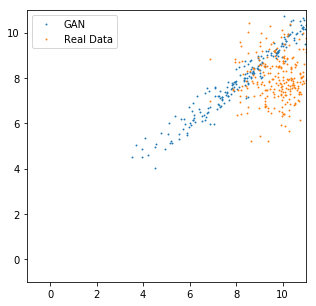

mean=[ 9.81546116  9.38680458], std=[ 3.03217244  2.71381044]
Epoch [70000/100000], d_loss: 1.3607, g_loss: 0.7088, D(x): 0.50, D(G(z)): 0.50


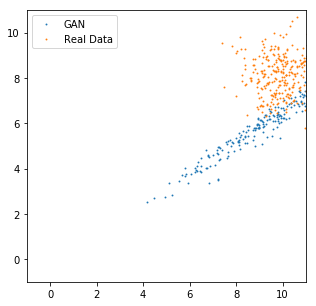

mean=[ 10.85607815   7.10739326], std=[ 3.25401735  2.29365802]
Epoch [70500/100000], d_loss: 1.3728, g_loss: 0.7044, D(x): 0.50, D(G(z)): 0.50


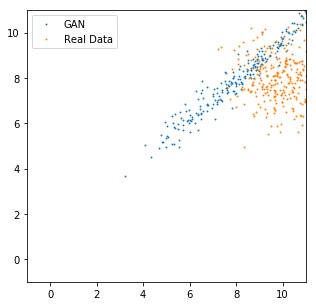

mean=[ 9.36958408  9.20622921], std=[ 2.97572732  2.73744249]
Epoch [71000/100000], d_loss: 1.3875, g_loss: 0.6983, D(x): 0.50, D(G(z)): 0.50


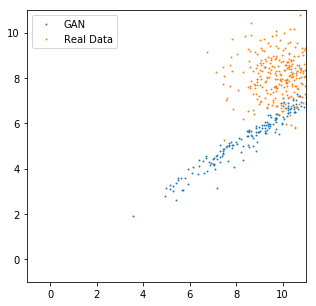

mean=[ 10.67604923   6.86414719], std=[ 2.9745841   2.07721782]
Epoch [71500/100000], d_loss: 1.4017, g_loss: 0.6933, D(x): 0.49, D(G(z)): 0.49


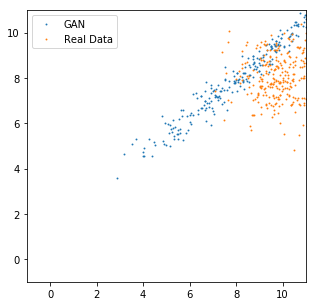

mean=[ 9.21182823  9.05992222], std=[ 2.94616628  2.63067174]
Epoch [72000/100000], d_loss: 1.4123, g_loss: 0.6826, D(x): 0.49, D(G(z)): 0.49


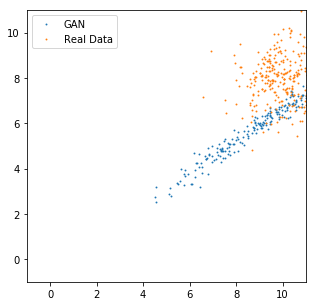

mean=[ 10.47083664   6.91861248], std=[ 3.14580822  2.20010519]
Epoch [72500/100000], d_loss: 1.4229, g_loss: 0.6819, D(x): 0.49, D(G(z)): 0.49


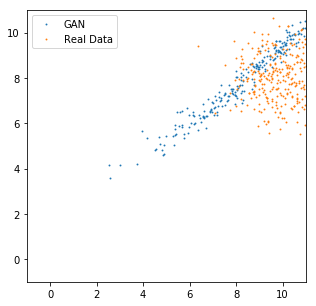

mean=[ 9.43160248  8.95703983], std=[ 2.80948138  2.47388935]
Epoch [73000/100000], d_loss: 1.4231, g_loss: 0.6706, D(x): 0.49, D(G(z)): 0.49


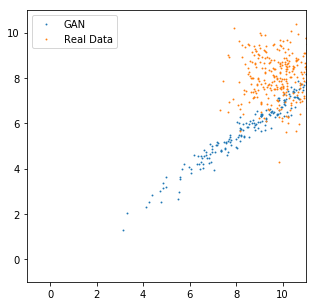

mean=[ 10.49074936   7.21773338], std=[ 3.1866045  2.3537221]
Epoch [73500/100000], d_loss: 1.4219, g_loss: 0.6773, D(x): 0.49, D(G(z)): 0.49


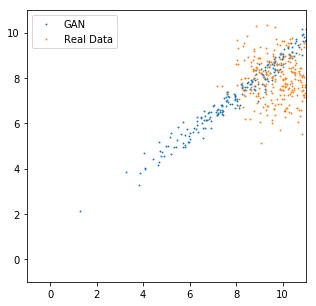

mean=[ 9.6349678   8.61581326], std=[ 3.16725469  2.70622396]
Epoch [74000/100000], d_loss: 1.4169, g_loss: 0.6727, D(x): 0.50, D(G(z)): 0.50


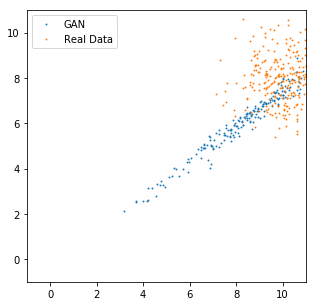

mean=[ 10.05037689   7.40940428], std=[ 3.06149483  2.36206841]
Epoch [74500/100000], d_loss: 1.3986, g_loss: 0.6825, D(x): 0.50, D(G(z)): 0.50


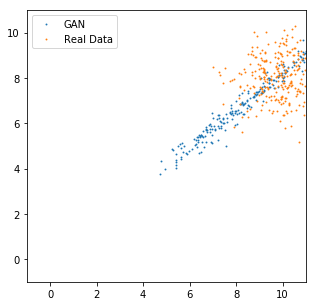

mean=[ 9.84674168  8.09959888], std=[ 3.03074884  2.50964046]
Epoch [75000/100000], d_loss: 1.3856, g_loss: 0.6915, D(x): 0.50, D(G(z)): 0.50


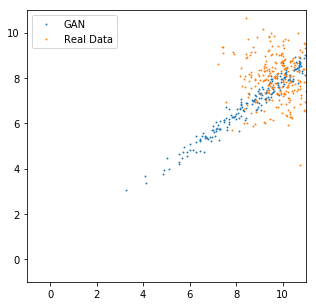

mean=[ 10.15844536   8.10668087], std=[ 2.82089305  2.26884413]
Epoch [75500/100000], d_loss: 1.3691, g_loss: 0.6968, D(x): 0.51, D(G(z)): 0.51


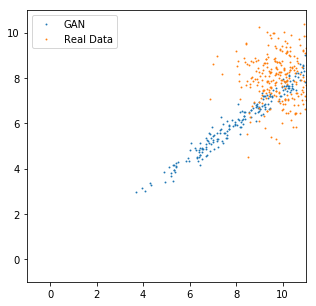

mean=[ 9.88078785  7.46168709], std=[ 2.99763703  2.35179734]
Epoch [76000/100000], d_loss: 1.3632, g_loss: 0.7082, D(x): 0.51, D(G(z)): 0.51


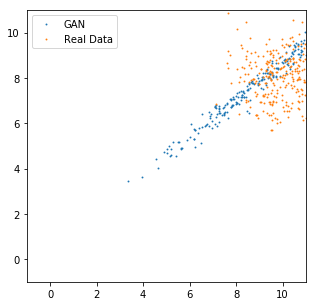

mean=[ 9.97719193  8.66670704], std=[ 2.99830365  2.5206461 ]
Epoch [76500/100000], d_loss: 1.3542, g_loss: 0.7077, D(x): 0.51, D(G(z)): 0.51


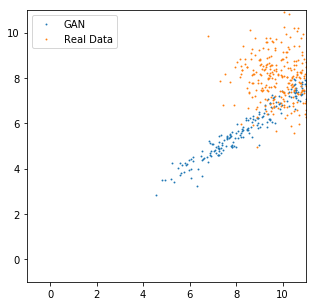

mean=[ 10.31219578   7.1855216 ], std=[ 3.00974536  2.21566486]
Epoch [77000/100000], d_loss: 1.3483, g_loss: 0.7170, D(x): 0.51, D(G(z)): 0.51


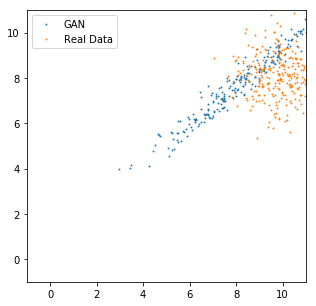

mean=[ 9.31719112  8.78868389], std=[ 2.77970791  2.43239784]
Epoch [77500/100000], d_loss: 1.3549, g_loss: 0.7106, D(x): 0.51, D(G(z)): 0.51


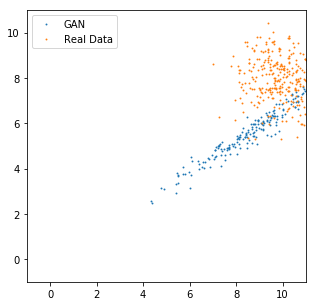

mean=[ 10.56506729   6.99076557], std=[ 3.14413238  2.2216475 ]
Epoch [78000/100000], d_loss: 1.3634, g_loss: 0.7121, D(x): 0.50, D(G(z)): 0.50


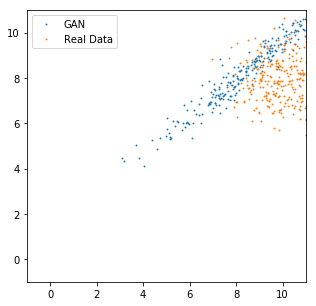

mean=[ 9.37171268  9.17932415], std=[ 2.73028946  2.44531775]
Epoch [78500/100000], d_loss: 1.3794, g_loss: 0.7040, D(x): 0.50, D(G(z)): 0.50


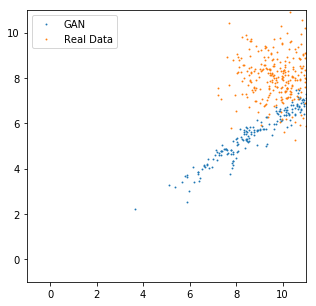

mean=[ 10.88628197   7.00752354], std=[ 3.20074487  2.2632556 ]
Epoch [79000/100000], d_loss: 1.3957, g_loss: 0.6935, D(x): 0.50, D(G(z)): 0.50


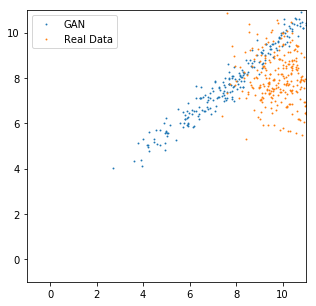

mean=[ 9.18469143  9.13588905], std=[ 3.08365107  2.794806  ]
Epoch [79500/100000], d_loss: 1.4107, g_loss: 0.6855, D(x): 0.49, D(G(z)): 0.49


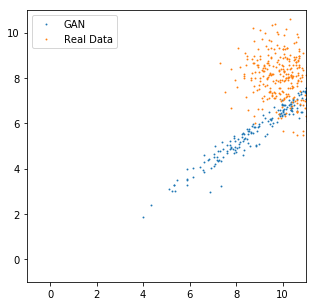

mean=[ 10.77982044   7.02948952], std=[ 2.90913582  2.08838272]
Epoch [80000/100000], d_loss: 1.4226, g_loss: 0.6825, D(x): 0.49, D(G(z)): 0.49


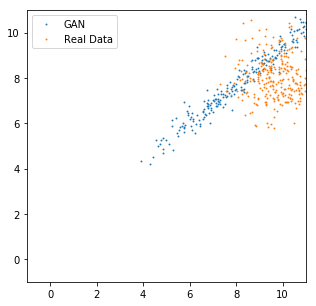

mean=[ 9.53048325  9.08386803], std=[ 2.96202874  2.64336324]
Epoch [80500/100000], d_loss: 1.4270, g_loss: 0.6687, D(x): 0.49, D(G(z)): 0.49


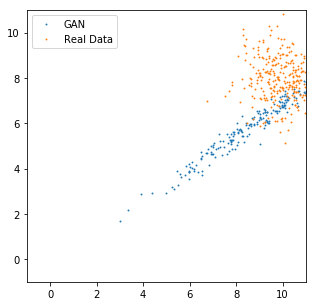

mean=[ 10.3166647    7.07339096], std=[ 2.95068121  2.11937547]
Epoch [81000/100000], d_loss: 1.4174, g_loss: 0.6787, D(x): 0.49, D(G(z)): 0.49


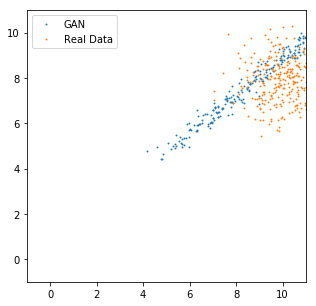

mean=[ 9.84090805  8.77289677], std=[ 2.92232728  2.49723053]
Epoch [81500/100000], d_loss: 1.4106, g_loss: 0.6719, D(x): 0.50, D(G(z)): 0.50


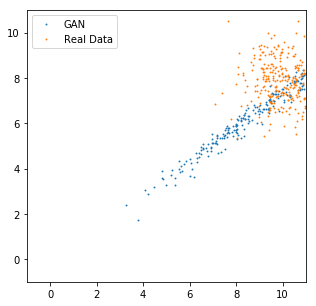

mean=[ 9.94736195  7.32412195], std=[ 2.94997382  2.29130483]
Epoch [82000/100000], d_loss: 1.3930, g_loss: 0.6859, D(x): 0.50, D(G(z)): 0.50


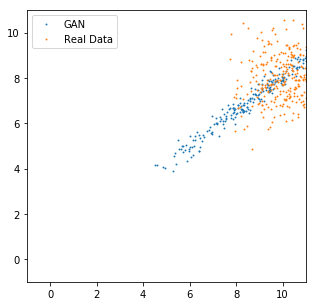

mean=[ 9.97833729  8.15276527], std=[ 2.91910458  2.37679815]
Epoch [82500/100000], d_loss: 1.3857, g_loss: 0.6895, D(x): 0.50, D(G(z)): 0.50


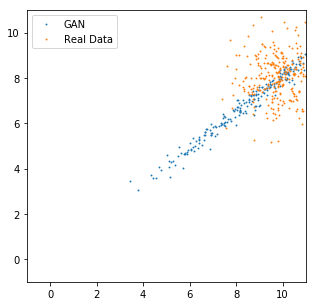

mean=[ 9.95533466  8.03364944], std=[ 3.03627276  2.43030572]
Epoch [83000/100000], d_loss: 1.3652, g_loss: 0.6940, D(x): 0.51, D(G(z)): 0.51


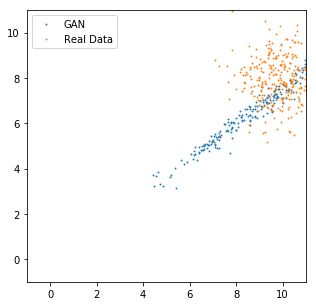

mean=[ 10.0592289    7.54716492], std=[ 2.86563253  2.22288728]
Epoch [83500/100000], d_loss: 1.3526, g_loss: 0.7132, D(x): 0.51, D(G(z)): 0.51


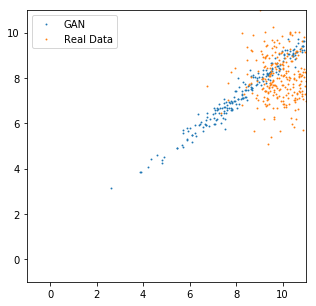

mean=[ 9.85443687  8.67445564], std=[ 2.83058691  2.42063236]
Epoch [84000/100000], d_loss: 1.3547, g_loss: 0.7061, D(x): 0.51, D(G(z)): 0.51


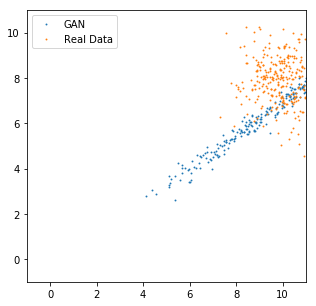

mean=[ 10.23474979   7.09928131], std=[ 2.87262559  2.15202856]
Epoch [84500/100000], d_loss: 1.3481, g_loss: 0.7162, D(x): 0.51, D(G(z)): 0.51


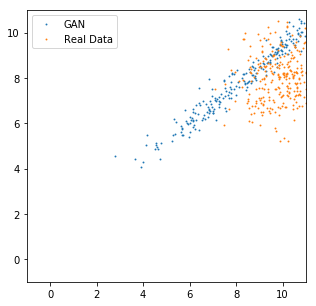

mean=[ 9.497159   9.0126543], std=[ 3.03844881  2.6512723 ]
Epoch [85000/100000], d_loss: 1.3570, g_loss: 0.7150, D(x): 0.50, D(G(z)): 0.50


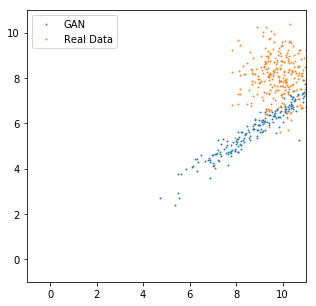

mean=[ 10.58297539   6.95281506], std=[ 2.89246774  2.03684187]
Epoch [85500/100000], d_loss: 1.3664, g_loss: 0.7063, D(x): 0.50, D(G(z)): 0.50


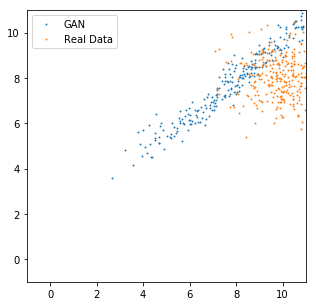

mean=[ 8.91908169  8.82953358], std=[ 2.89347935  2.5745604 ]
Epoch [86000/100000], d_loss: 1.3833, g_loss: 0.7035, D(x): 0.50, D(G(z)): 0.50


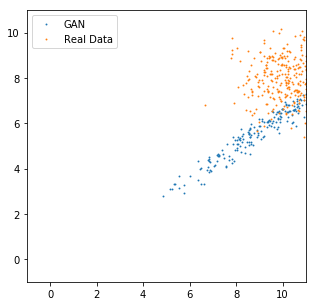

mean=[ 10.7792511    6.91938639], std=[ 2.98604226  2.1136682 ]
Epoch [86500/100000], d_loss: 1.3951, g_loss: 0.6974, D(x): 0.49, D(G(z)): 0.49


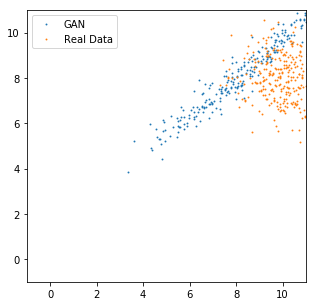

mean=[ 9.14686966  9.03790951], std=[ 2.74867821  2.46004486]
Epoch [87000/100000], d_loss: 1.4041, g_loss: 0.6825, D(x): 0.50, D(G(z)): 0.50


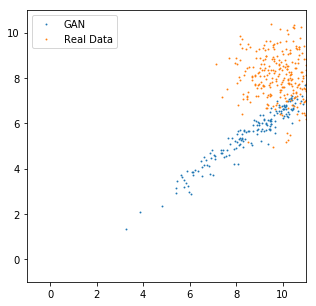

mean=[ 10.88469791   7.152771  ], std=[ 3.18078375  2.30034375]
Epoch [87500/100000], d_loss: 1.4175, g_loss: 0.6873, D(x): 0.49, D(G(z)): 0.49


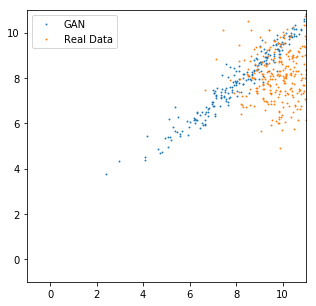

mean=[ 9.53072739  9.13119507], std=[ 2.79529595  2.49430966]
Epoch [88000/100000], d_loss: 1.4238, g_loss: 0.6773, D(x): 0.49, D(G(z)): 0.49


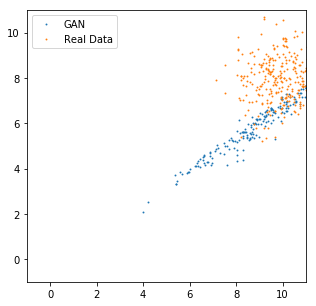

mean=[ 10.5688343    7.10153151], std=[ 2.89602923  2.0799365 ]
Epoch [88500/100000], d_loss: 1.4263, g_loss: 0.6720, D(x): 0.49, D(G(z)): 0.49


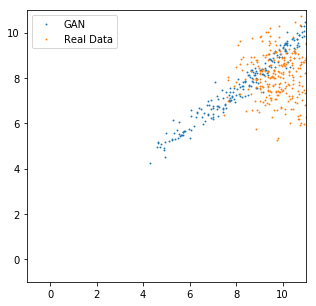

mean=[ 9.65466022  8.89888382], std=[ 2.73328638  2.345047  ]
Epoch [89000/100000], d_loss: 1.4213, g_loss: 0.6800, D(x): 0.49, D(G(z)): 0.49


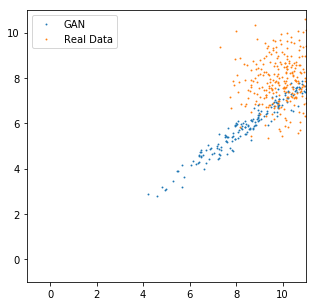

mean=[ 10.58388901   7.44199562], std=[ 3.11548138  2.33397985]
Epoch [89500/100000], d_loss: 1.4214, g_loss: 0.6679, D(x): 0.50, D(G(z)): 0.50


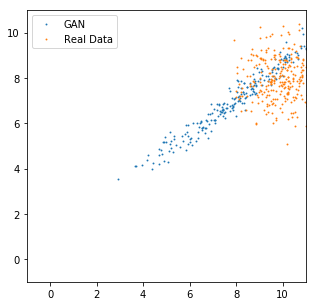

mean=[ 9.31293106  8.18223953], std=[ 2.97306085  2.42958331]
Epoch [90000/100000], d_loss: 1.4081, g_loss: 0.6856, D(x): 0.49, D(G(z)): 0.49


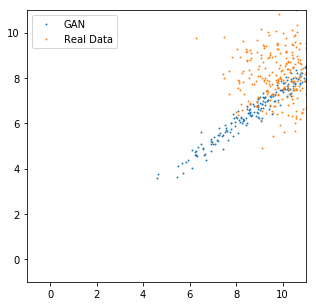

mean=[ 10.67098045   7.99160004], std=[ 3.04482436  2.33544683]
Epoch [90500/100000], d_loss: 1.3938, g_loss: 0.6762, D(x): 0.51, D(G(z)): 0.51


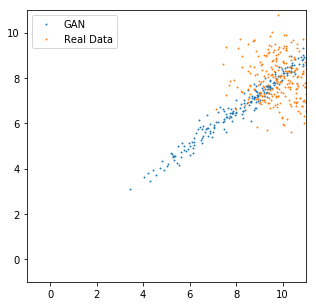

mean=[ 9.63531113  7.86402273], std=[ 2.85860372  2.25790548]
Epoch [91000/100000], d_loss: 1.3930, g_loss: 0.6949, D(x): 0.50, D(G(z)): 0.50


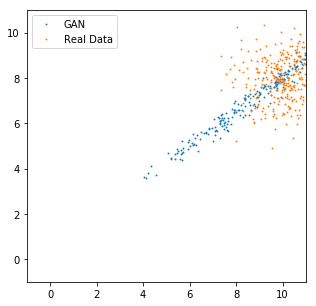

mean=[ 9.9948225   8.07705688], std=[ 2.98134255  2.35260344]
Epoch [91500/100000], d_loss: 1.3625, g_loss: 0.7035, D(x): 0.51, D(G(z)): 0.51


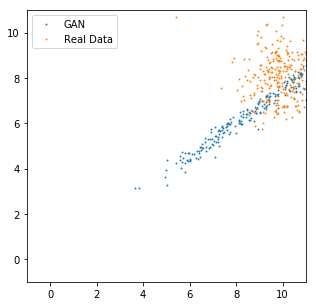

mean=[ 9.96115589  7.46208477], std=[ 2.87680531  2.16483998]
Epoch [92000/100000], d_loss: 1.3675, g_loss: 0.6985, D(x): 0.51, D(G(z)): 0.51


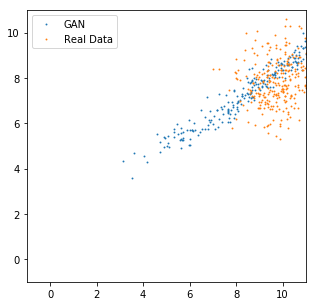

mean=[ 9.75675011  8.36954403], std=[ 3.04424834  2.3158195 ]
Epoch [92500/100000], d_loss: 1.3542, g_loss: 0.7083, D(x): 0.51, D(G(z)): 0.51


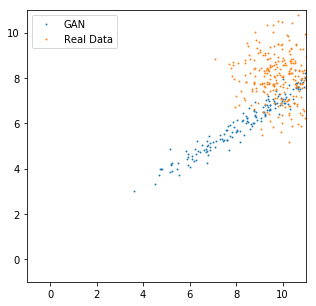

mean=[ 10.63665676   7.57380676], std=[ 3.21481013  2.2146771 ]
Epoch [93000/100000], d_loss: 1.3515, g_loss: 0.7058, D(x): 0.51, D(G(z)): 0.51


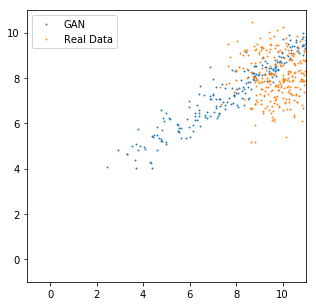

mean=[ 9.50526619  8.70321751], std=[ 3.44347477  2.59009123]
Epoch [93500/100000], d_loss: 1.3510, g_loss: 0.7163, D(x): 0.51, D(G(z)): 0.51


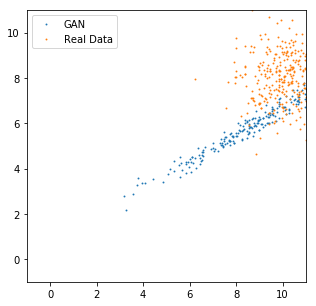

mean=[ 10.4637146    7.06495094], std=[ 3.72831774  2.38363767]
Epoch [94000/100000], d_loss: 1.3523, g_loss: 0.7140, D(x): 0.51, D(G(z)): 0.51


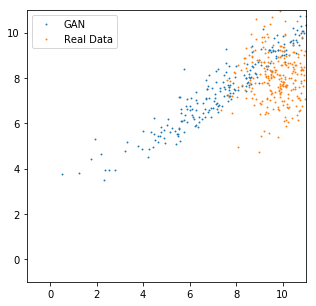

mean=[ 9.19314861  8.90307426], std=[ 3.64035034  2.88089418]
Epoch [94500/100000], d_loss: 1.3664, g_loss: 0.7067, D(x): 0.50, D(G(z)): 0.50


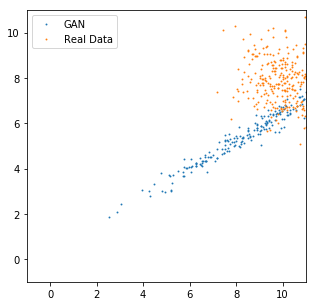

mean=[ 10.44948483   6.75644827], std=[ 3.66870499  2.32029629]
Epoch [95000/100000], d_loss: 1.3794, g_loss: 0.7044, D(x): 0.50, D(G(z)): 0.50


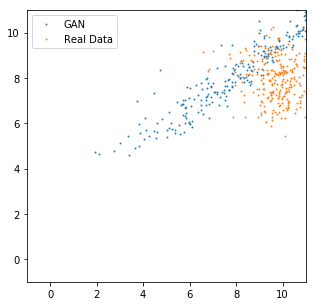

mean=[ 9.44167328  9.39629936], std=[ 3.37872577  2.72418952]
Epoch [95500/100000], d_loss: 1.3967, g_loss: 0.6954, D(x): 0.49, D(G(z)): 0.49


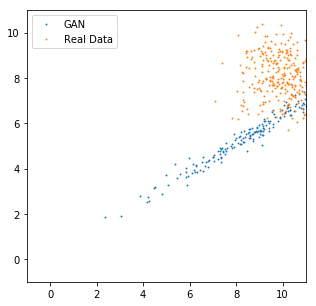

mean=[ 10.87910175   6.93567801], std=[ 3.62478924  2.30797577]
Epoch [96000/100000], d_loss: 1.4175, g_loss: 0.6723, D(x): 0.50, D(G(z)): 0.50


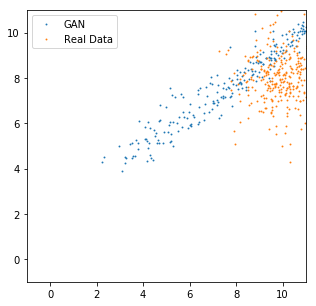

mean=[ 9.16883087  8.89798927], std=[ 3.45977688  2.74804974]
Epoch [96500/100000], d_loss: 1.4219, g_loss: 0.6968, D(x): 0.48, D(G(z)): 0.48


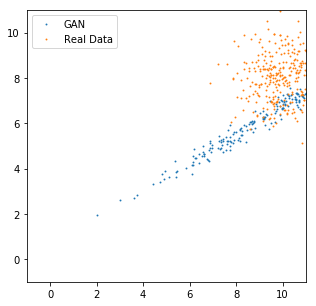

mean=[ 11.10568237   7.50806808], std=[ 3.92163157  2.5655365 ]
Epoch [97000/100000], d_loss: 1.4204, g_loss: 0.6580, D(x): 0.50, D(G(z)): 0.50


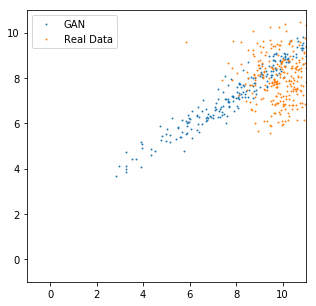

mean=[ 9.5379982   8.50286579], std=[ 3.23106241  2.4494946 ]
Epoch [97500/100000], d_loss: 1.4127, g_loss: 0.6869, D(x): 0.49, D(G(z)): 0.49


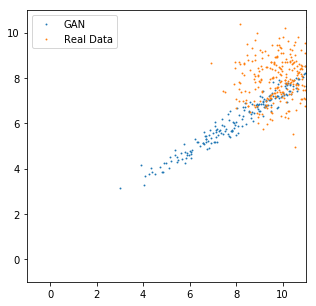

mean=[ 10.24103642   7.6663084 ], std=[ 3.55498409  2.4871304 ]
Epoch [98000/100000], d_loss: 1.3822, g_loss: 0.6856, D(x): 0.51, D(G(z)): 0.51


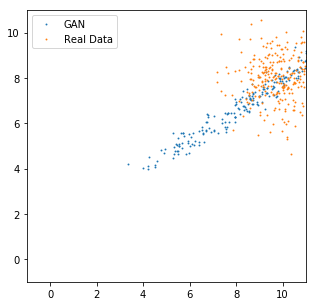

mean=[ 10.17722225   8.18997192], std=[ 3.49059892  2.54949927]
Epoch [98500/100000], d_loss: 1.3764, g_loss: 0.6978, D(x): 0.50, D(G(z)): 0.50


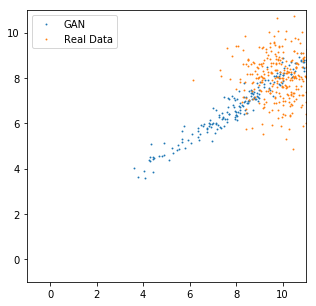

mean=[ 10.22952366   8.41685867], std=[ 3.38533711  2.56057835]
Epoch [99000/100000], d_loss: 1.3601, g_loss: 0.7001, D(x): 0.51, D(G(z)): 0.51


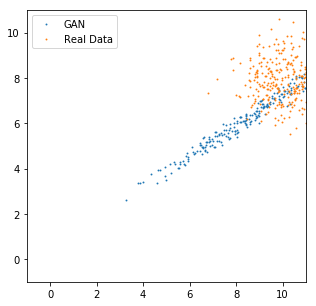

mean=[ 9.97323036  7.29162455], std=[ 3.26481414  2.29175115]
Epoch [99500/100000], d_loss: 1.3507, g_loss: 0.7155, D(x): 0.51, D(G(z)): 0.51


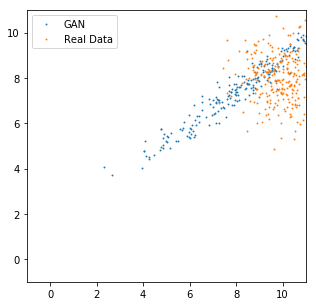

mean=[ 9.68744469  8.78217983], std=[ 3.22091842  2.59724259]


In [6]:
for epoch in range(max_epoch):
    x = Variable(sample_real(batch_size)).cuda()
    real_labels = Variable(torch.ones(batch_size,1)).cuda()
    fake_labels = Variable(torch.zeros(batch_size,1)).cuda()

    outputs = D(x)
    d_loss_real = criterion(outputs, real_labels)
    real_score = outputs

    z = Variable(torch.randn(batch_size, z_dim)).cuda()
    fake_images = G(z).detach()
    outputs = D(fake_images)
    d_loss_fake = criterion(outputs, fake_labels)
    fake_score = outputs

    # Backprop + Optimize
    d_loss = d_loss_real + d_loss_fake
    D.zero_grad()
    d_loss.backward()
    d_optimizer.step()

    z = Variable(torch.randn(batch_size, z_dim)).cuda()
    fake_images = G(z)
    outputs = D(fake_images)

    g_loss = criterion(outputs, real_labels)

    # Backprop + Optimize
    D.zero_grad()
    G.zero_grad()
    g_loss.backward()
    g_optimizer.step()
    
    if epoch%500==0:
        print('Epoch [%d/%d], d_loss: %.4f, g_loss: %.4f, D(x): %.2f, D(G(z)): %.2f'
              %(epoch, max_epoch, d_loss.item(), g_loss.item(), real_score.mean().item(), real_score.mean().item()))

    if epoch%500==0:
        mean, std = plot_decoder()
        plt.show()
        print('mean={}, std={}'.format(mean, std))